In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import  gc

############
#INPUTS
#############

index = "BANKNIFTY"
index_file_path = "D:/Dispersion/Dispersion Data - 2016_2020/Banknifty - All Delta/BANKNIFTY.csv"

stfolder = "D:/Dispersion/Dispersion Data - 2016_2020/BN Dispersion - All Delta"
    
wgt_lot_path = "D:/Dispersion/Dispersion Data - 2021/BankNifty Weights/BN Mcap & includeok - Copy.csv"

direc = r"C:/Users/admin/Desktop/Dispersion Working Files - 16.22 - Only Correlation - Futures Hedge"

output_path = r"C:/Users/admin/Desktop/Dispersion output files check - 16.22 - Only Correlation - Futures Hedge"

index_lotsize = 1

initial_equity = 100000

#########################
#Creating Stock List
#######################

filename = next(walk(stfolder), (None, None, []))[2]  # [] if no file
stock_list_path = []
for i in filename:
    temp = stfolder +"/"+ i
    stock_list_path.append(temp)

stock_list = []
for i in stock_list_path:
    stock_list.append(i.replace(".csv","").replace(stfolder + "/",""))
print(stock_list)
    
######################################    
#Creating weight and lot dictionary
######################################

"""wgtlot_df = pd.read_csv(wgt_lot_path)
wgtlot_dict = wgtlot_df.set_index('Symbol').T.to_dict('list')
print(wgtlot_dict)
symbols = list(wgtlot_dict.keys())"""

### Now adding Columns for weights below

####################################

lookback_period = 15
std_dev = 2

#################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path = "expiry_dates.csv"
exp_df = pd.read_csv(exp_file_path,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN', 'YESBANK']


In [2]:
idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('- I')]
df2 = idx[idx['Ticker'].str.endswith('- II')]
df3 = idx[idx['Ticker'].str.endswith('- III')]



index_file_path = direc + "/BANKNIFTY.csv"

df1.to_csv(index_file_path)
df2.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"))
df3.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-III"))

print(idx.shape[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0])
    
for i in stock_list:
    df = pd.read_csv(stfolder + '/' + i + ".csv",parse_dates = ["Date"],dayfirst = True)
    df1 = df[df['Ticker'].str.endswith('- I')]
    df2 = df[df['Ticker'].str.endswith('- II')]
    df3 = df[df['Ticker'].str.endswith('- III')]
    
    path = direc + '/' + i + ".csv"
    
    df1.to_csv(path)
    df2.to_csv(path.replace(i,i+"-II"))
    df3.to_csv(path.replace(i,i+"-III"))
    
    print(df.shape[0])
    print(df1.shape[0]+df2.shape[0]+df3.shape[0])

stfolder = direc
print(index_file_path)

1486826
343290
169540
169540
25538
25538
136480
136480
106465
106465
159450
159450
157490
157490
181844
181844
167624
167624
110306
110306
187784
187784
186026
186026
146610
146610
109058
109058
175724
175724
133296
133296
C:/Users/admin/Desktop/Dispersion Working Files - 16.22 - Only Correlation - Futures Hedge/BANKNIFTY.csv


In [3]:
idx = pd.read_csv(index_file_path,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money", "Delta"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')

final.to_csv(output_path+"/check-1data.csv")

print(final)
for i in stock_list:
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money","Delta"])


    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")


     BANKNIFTY_Date_CE   BANKNIFTY_Ticker_CE BANKNIFTY_OPT_Close_CE  \
0           2016-01-01  BANKNIFTY17000CE - I                 369.05   
1           2016-01-04  BANKNIFTY16600CE - I                 359.55   
2           2016-01-05  BANKNIFTY16500CE - I                 376.45   
3           2016-01-06  BANKNIFTY16400CE - I                 360.95   
4           2016-01-07  BANKNIFTY16100CE - I                 348.25   
...                ...                   ...                    ...   
1228        2020-12-24  BANKNIFTY30400CE - I                  359.8   
1229        2020-12-28  BANKNIFTY30900CE - I                 309.05   
1230        2020-12-29  BANKNIFTY31300CE - I                  279.2   
1231        2020-12-30  BANKNIFTY31300CE - I                 203.85   
1232        2020-12-31  BANKNIFTY31300CE - I                   0.05   

     BANKNIFTY_Strike_CE BANKNIFTY_IV_CE BANKNIFTY_Delta_CE  \
0                17000.0           0.173             0.5568   
1                1660

In [4]:
idx = pd.read_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money","Delta"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At The Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')
final.to_csv(output_path+"/check-3data.csv")

for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path.replace(i,i+"-II"),parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At The Money","Delta"])
    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')

    
    df_ce = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At The Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
final = final.T.drop_duplicates().T
next_final_df = final.copy()

next_final_df.to_csv(output_path+"/check-4.0data.csv")


u = next_final_df.select_dtypes(exclude=['datetime'])
next_final_df[u.columns] = u.fillna(0)

next_final_df.to_csv(output_path+"/check-4data.csv")


AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [5]:
replacedf = curr_final_df[curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"]]
restdf = curr_final_df[~(curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"])]

nextdf = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_curr_exp_date_CE"]]

print(replacedf.shape[0])
print(restdf.shape[0])
print(nextdf.shape[0])
print(next_final_df.shape[0])


for i in symbols:
    if nextdf.shape[0] == replacedf.shape[0]:
        replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
        replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
        print("EXCHANGE DONE")
    else:
        print("Entries Missing Error")
        break

final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

60
1173
60
1233
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE


<ipython-input-5-af3cdaa66d50>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
<ipython-input-5-af3cdaa66d50>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]


In [6]:
final.to_csv(output_path+"\Part-1data.csv")
data = pd.read_csv(output_path+"\Part-1data.csv",parse_dates = [index + "_Date_CE"],dayfirst = True)

In [7]:
#Adding Avg IV Columns
data[index + "_Avg IV"] = (data[index + "_IV_CE"] + data[index + "_IV_PE"])/2
curr_final_df[index + "_Avg IV"] = data[index + "_Avg IV"]
for i in stock_list:
    data[i + "_Avg IV"] = (data[i + "_IV_CE"] + data[i + "_IV_PE"])/2
    curr_final_df[i + "_Avg IV"] = data[i + "_Avg IV"]
data = curr_final_df.copy()

# Adding Weights Columns

In [8]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","includeok","Lotsize"])

In [9]:
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

display(data)

<ipython-input-9-021f4af53298>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-9-021f4af53298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]


7652
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,FEDERALBNK_OG_Weight,HDFCBANK_OG_Weight,ICICIBANK_OG_Weight,IDFCFIRSTB_OG_Weight,INDUSINDBK_OG_Weight,KOTAKBANK_OG_Weight,PNB_OG_Weight,RBLBANK_OG_Weight,SBIN_OG_Weight,YESBANK_OG_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,...,0.96,26.83,14.92,NaN,5.58,13.01,2.25,NaN,17.26,3.00
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,...,0.96,27.11,14.90,NaN,5.56,12.96,2.22,NaN,17.18,2.97
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,...,0.97,27.03,15.03,NaN,5.59,13.07,2.19,NaN,17.03,2.99
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,...,0.96,27.30,14.73,NaN,5.68,13.06,2.18,NaN,17.06,2.99
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,...,0.94,27.70,14.90,NaN,5.71,13.16,2.14,NaN,16.89,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,0.5200,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,...,0.60,35.40,16.31,0.94,2.97,17.86,1.52,0.61,10.96,NaN
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,...,0.61,35.25,16.26,0.95,2.97,17.84,1.54,0.62,11.13,NaN
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,0.5229,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,...,0.60,35.16,16.33,0.93,3.09,17.71,1.56,0.62,11.09,NaN
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.5090,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,...,0.60,35.27,16.32,0.93,3.04,17.87,1.53,0.62,11.05,NaN


### Adding Final Weight Columns

In [10]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [11]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,HDFCBANK_Final_Weight,ICICIBANK_Final_Weight,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,...,0.268273,0.149185,0.000000,0.055794,0.130087,0.022498,0.000000,0.172583,0.029997,1
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,...,0.271127,0.149015,0.000000,0.055606,0.129613,0.022202,0.000000,0.171817,0.029703,1
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,...,0.270327,0.150315,0.000000,0.055906,0.130713,0.021902,0.000000,0.170317,0.029903,1
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,...,0.273000,0.147300,0.000000,0.056800,0.130600,0.021800,0.000000,0.170600,0.029900,1
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,...,0.277000,0.149000,0.000000,0.057100,0.131600,0.021400,0.000000,0.168900,0.029600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,0.5200,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,...,0.354000,0.163100,0.009400,0.029700,0.178600,0.015200,0.006100,0.109600,0.000000,1
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,...,0.352465,0.162584,0.009499,0.029697,0.178382,0.015398,0.006199,0.111289,0.000000,1
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,0.5229,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,...,0.351635,0.163316,0.009301,0.030903,0.177118,0.015602,0.006201,0.110911,0.000000,1
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.5090,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,...,0.352735,0.163216,0.009301,0.030403,0.178718,0.015302,0.006201,0.110511,0.000000,1


In [12]:
data['index_iv'] = data[index +'_Avg IV']*100
data['stock_iv']  = 0
for i in stock_list:
    data['stock_iv'] += data[i + '_Avg IV']*data[i + "_Final_Weight"] 
    
data['implied_correl'] = (data['index_iv']/data['stock_iv'])

print(data.isnull().sum().sum())

3952


In [13]:
data['avg'] = data['implied_correl'].rolling(lookback_period).mean()
df = data.copy()

df.to_csv(output_path+'/impliedratio.csv')

In [14]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * std_dev # Calculate top band
    bollinger_down = sma - std * std_dev # Calculate bottom band
    return bollinger_up, bollinger_down

df['bollinger_up'], df['bollinger_down'] = get_bollinger_bands(df['implied_correl'], lookback_period)

df['sma'] = get_sma(df['implied_correl'], lookback_period)
df['long_avg'] = df['implied_correl'].mean()


#print(df['bollinger_up'])
#print(df['bollinger_down'])
#print(df['long_avg'])
#print(df['sma'])

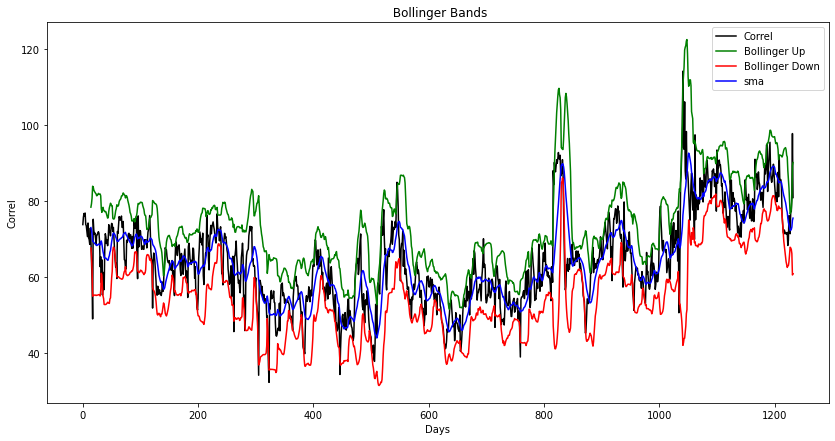

In [15]:
import matplotlib.pyplot as plt

df.head()

fig = plt.figure(figsize=(14,7))
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Correl')
plt.plot(df['implied_correl'], label='Correl', c = 'black')
plt.plot(df['bollinger_up'], label='Bollinger Up', c='g')
plt.plot(df['bollinger_down'], label='Bollinger Down', c='r')
plt.plot(df['sma'], label='sma', c='b')

plt.legend()
plt.show()

In [16]:
df.to_csv(output_path+"\series.csv")

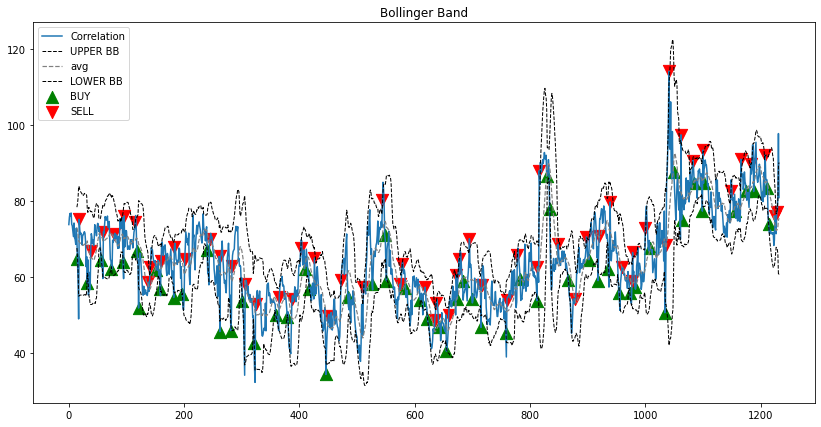

In [17]:
def implement_bb_strategy(data, lower_bb, upper_bb, avg):
    entry_ratio = []
    exit_ratio = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if(i==0):
            if data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            elif data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(0)
        else:
            if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] > avg[i-1] and data[i] < avg[i]:
                if signal != 0:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])                
            
            elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] < avg[i-1] and data[i] > avg[i]:
                if signal != 0:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(bb_signal[i-1])

    return entry_ratio, exit_ratio, bb_signal

df['entry_ratio'], df['exit_ratio'], df['bb_signal'] = implement_bb_strategy(df['implied_correl'], df['bollinger_down'], df['bollinger_up'], df['avg'])

fig = plt.figure(figsize=(14,7))


df['implied_correl'].plot(label = 'Correlation', alpha = 1)
df['bollinger_up'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['avg'].plot(label = 'avg', linestyle = '--', linewidth = 1.2, color = 'grey')
df['bollinger_down'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, df['entry_ratio'], marker = '^', color = 'green', label = 'BUY', s = 150)
plt.scatter(df.index, df['exit_ratio'], marker = 'v', color = 'red', label = 'SELL', s = 150)
plt.title('Bollinger Band')
plt.legend(loc = 'upper left')
plt.show()


In [18]:
df1 = df.copy()

In [19]:
df1['dispersion_entry'] = False #(df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
df1['dispersion_exit'] = False #(df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

df1['correlation_entry'] = np.nan
df1['correlation_exit'] = np.nan
df1['bb_signal'] = np.nan

#df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
#df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False):

df1['bb_signal'] = df1.apply(lambda x: 0 if x['BANKNIFTY_Date_CE']==x['BANKNIFTY_curr_exp_date_CE'] else 1, axis=1)



for i in range(len(df1)):
    if(i==0):
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i-1,'BANKNIFTY_Date_CE'] == df1.loc[i-1,'BANKNIFTY_curr_exp_date_CE']):  
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i,'BANKNIFTY_Date_CE'] == df1.loc[i,'BANKNIFTY_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = True
    else:
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = False

display(df1)          
    

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_Delta_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,bollinger_down,sma,long_avg,entry_ratio,exit_ratio,bb_signal,dispersion_entry,dispersion_exit,correlation_entry,correlation_exit
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.1730,0.5568,17033.8008,2016-01-28,BANKNIFTY17000PE - I,272.5000,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,True,False
1,2016-01-04,BANKNIFTY16600CE - I,359.55,16600.0,0.1989,0.5307,16590.1504,2016-01-28,BANKNIFTY16600PE - I,332.9000,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
2,2016-01-05,BANKNIFTY16500CE - I,376.45,16500.0,0.1973,0.5565,16545.1504,2016-01-28,BANKNIFTY16500PE - I,302.8000,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
3,2016-01-06,BANKNIFTY16400CE - I,360.95,16400.0,0.1988,0.5495,16431.6992,2016-01-28,BANKNIFTY16400PE - I,309.2000,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
4,2016-01-07,BANKNIFTY16100CE - I,348.25,16100.0,0.2246,0.5135,16060.7002,2016-01-28,BANKNIFTY16100PE - I,354.8000,...,NaN,NaN,64.428187,NaN,NaN,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY30400CE - I,359.80,30400.0,0.2049,0.5200,30402.1992,2020-12-31,BANKNIFTY30400PE - I,326.0500,...,67.627833,72.273736,64.428187,NaN,77.117174,1,False,False,False,False
1229,2020-12-28,BANKNIFTY30900CE - I,309.05,30900.0,0.2796,0.5018,30880.9492,2020-12-31,BANKNIFTY30900PE - I,280.2000,...,67.232562,72.495861,64.428187,NaN,NaN,1,False,False,False,False
1230,2020-12-29,BANKNIFTY31300CE - I,279.20,31300.0,0.2849,0.5229,31322.5000,2020-12-31,BANKNIFTY31300PE - I,216.5500,...,66.150468,73.146637,64.428187,NaN,NaN,1,False,False,False,False
1231,2020-12-30,BANKNIFTY31300CE - I,203.85,31300.0,0.3063,0.5090,31303.0508,2020-12-31,BANKNIFTY31300PE - I,159.5500,...,60.495897,74.910501,64.428187,NaN,NaN,1,False,False,False,False


In [20]:
df2 = df1.copy()


# df2_index = df2.index
# exp_dates = list(df2_index[df2[index + "_curr_exp_date_CE"] == df2[index+"_Date_CE"]])
# print(exp_dates)
# for i in exp_dates:
#     if df2.iloc[i]["bb_signal"] == -1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = True
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = False
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]

#         df2.loc[i+1,'dispersion_entry'] = True
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = False
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = -1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
#     elif df2.iloc[i]["bb_signal"] == 1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = False
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = True
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
        
#         df2.loc[i+1,'dispersion_entry'] = False
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = True
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = 1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
        
#     elif df2.iloc[i]["bb_signal"] == 0:
#         continue
        
# df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
#               (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df2.to_csv(output_path + '/with entry exit signals_all data.csv')

In [21]:
df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df.to_csv(output_path + '/with entry exit signals.csv')

In [22]:
trades = []

for i in df.index[:-1]:
    if df["bb_signal"][i] == -1:
        strikes = {}
        strikes[index] = df[index + "_Strike_CE"][i]
        for j in stock_list:
            strikes[j] = df[j+"_Strike_CE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                          "type_of_trade": "SILS",
                          "strike" : strikes,
                          "entry_ratio" : df["exit_ratio"][i],
                          "exit_ratio" : df["entry_ratio"][i+1],
                            
                        }
                      )
                            
    if df["bb_signal"][i] == 1:
            strikes = {}
            strikes[index] = df[index + "_Strike_CE"][i]
            for j in stock_list:
                strikes[j] = df[j+"_Strike_CE"][i]
            trades.append( 
                            { 
                              "entry_date": df[index + "_Date_CE"][i],
                              "exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "type_of_trade": "LISS",
                              "strike" : strikes,
                              "entry_ratio" : df["entry_ratio"][i],
                              "exit_ratio" : df["exit_ratio"][i+1],
                            }
                          )

In [23]:
for i in trades:
    date1 = i["entry_date"]
    date2 = i["exit_date"]
    expiry = i["expiry_date"]
    print(date1)
    print(date2)
    
    if expiry == date1:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        nextdf = pd.read_csv(index_file_path.replace(index,index+"-II"),parse_dates = ["Date"])
        
        df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
        nextdf = nextdf.append(df)
        nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = nextdf

        for j in stock_list:
            path = stfolder + '/' + j + ".csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])
        
            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][j])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
            df_dict[j] = nextdf
        i["dataframes"] = df_dict
    
    else:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        df = pd.merge(df, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = df

        for j in stock_list:
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            df = pd.merge(df, exp_df, on = 'Date', how = 'left')
            df_dict[j] = df
        i["dataframes"] = df_dict

2016-01-01 00:00:00
2016-01-28 00:00:00
2016-01-29 00:00:00
2016-02-25 00:00:00
2016-02-26 00:00:00
2016-03-31 00:00:00
2016-04-01 00:00:00
2016-04-28 00:00:00
2016-04-29 00:00:00
2016-05-26 00:00:00
2016-05-27 00:00:00
2016-06-30 00:00:00
2016-07-01 00:00:00
2016-07-28 00:00:00
2016-07-29 00:00:00
2016-08-25 00:00:00
2016-08-26 00:00:00
2016-09-29 00:00:00
2016-09-30 00:00:00
2016-10-27 00:00:00
2016-10-28 00:00:00
2016-11-24 00:00:00
2016-11-25 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2017-01-25 00:00:00
2017-01-27 00:00:00
2017-02-23 00:00:00
2017-02-27 00:00:00
2017-03-30 00:00:00
2017-03-31 00:00:00
2017-04-27 00:00:00
2017-04-28 00:00:00
2017-05-25 00:00:00
2017-05-26 00:00:00
2017-06-29 00:00:00
2017-06-30 00:00:00
2017-07-27 00:00:00
2017-07-28 00:00:00
2017-08-31 00:00:00
2017-09-01 00:00:00
2017-09-28 00:00:00
2017-09-29 00:00:00
2017-10-26 00:00:00
2017-10-27 00:00:00
2017-11-30 00:00:00
2017-12-01 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2018-01-25 00:00:00


In [24]:
for i in trades:
    print(i["dataframes"]['BANKNIFTY'].columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Ticker', 'OPT_Open', 'OPT_High',
       'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike',
       'Option_Type', 'IV', 'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open',
       'EQ_High', 'EQ_Low', 'EQ_Close', 'Ticker_Type', 'At The Money',
       'Delta_15_Diff', 'Delta_15_Diff_Min', 'Delta_15_Strike',
       'Delta_20_Diff', 'Delta_20_Diff_Min', 'Delta_20_Strike',
       'Delta_25_Diff', 'Delta_25_Diff_Min', 'Delta_25_Strike',
       'Delta_30_Diff', 'Delta_30_Diff_Min', 'Delta_30_Strike',
       'Delta_35_Diff', 'Delta_35_Diff_Min', 'Delta_35_Strike',
       'Delta_40_Diff', 'Delta_40_Diff_Min', 'Delta_40_Strike',
       'Delta_45_Diff', 'Delta_45_Diff_Min', 'Delta_45_Strike',
       'Delta_50_Strike', 'curr_exp_date'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Ticker', 'OPT_Open', 'OPT_High',
       'OPT_Low', 'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike',
       'Option_Type', 'IV', 'Delta', 'Theta', '

In [25]:
result = pd.DataFrame()
for trade_dict in trades:
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    
    idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date","Delta"]]
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")

    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")
    
    for i in df_dict:
        if i == index:
            continue
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date","Delta"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

        temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
        temp = temp.T.drop_duplicates().T
        temp = temp.add_prefix(i +"_")
        
        final = final.merge(temp,left_on=index + '_Date_CE' , right_on= i + '_Date_CE', how = 'left')
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
        
result = result.T.drop_duplicates().T

In [26]:
data = result.copy()

In [27]:
display(data)
data.to_csv(output_path + '/before_weigt_add_second_time.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,YESBANK_IV_CE,YESBANK_EQ_Close_CE,YESBANK_curr_exp_date_CE,YESBANK_Delta_CE,YESBANK_Ticker_PE,YESBANK_OPT_Close_PE,YESBANK_IV_PE,YESBANK_Delta_PE,Trade_Type,D_marker
0,2016-01-01,BANKNIFTY17000CE - I,369.05,17000.0,0.173,17033.8008,2016-01-28,0.5568,BANKNIFTY17000PE - I,272.5,...,0.2835,146.49,2016-01-28,0.4809,YESBANK148PE - I,4.59,0.2569,-0.5229,LISS,F
1,2016-01-04,BANKNIFTY17000CE - I,183.95,17000.0,0.1933,16590.1504,2016-01-28,0.3438,BANKNIFTY17000PE - I,550.1,...,0.322,141.15,2016-01-28,0.3107,YESBANK148PE - I,8.45,0.3111,-0.6953,LISS,M
2,2016-01-05,BANKNIFTY17000CE - I,156.4,17000.0,0.1895,16545.1504,2016-01-28,0.3153,BANKNIFTY17000PE - I,572.0,...,0.3204,141.54,2016-01-28,0.3169,YESBANK148PE - I,8.0,0.3022,-0.6939,LISS,M
3,2016-01-06,BANKNIFTY17000CE - I,115.6,17000.0,0.1882,16431.6992,2016-01-28,0.2584,BANKNIFTY17000PE - I,658.8,...,0.3285,140.77,2016-01-28,0.2932,YESBANK148PE - I,7.82,0.2419,-0.7765,LISS,M
4,2016-01-07,BANKNIFTY17000CE - I,59.35,17000.0,0.2089,16060.7002,2016-01-28,0.1464,BANKNIFTY17000PE - I,947.9,...,0.3594,135.77,2016-01-28,0.1775,YESBANK148PE - I,12.6,0.3253,-0.8476,LISS,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2020-12-24,BANKNIFTY29600CE - I,936.8,29600.0,0.2345,30402.1992,2020-12-31,0.8074,BANKNIFTY29600PE - I,86.4,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,LISS,M
19,2020-12-28,BANKNIFTY29600CE - I,1360.85,29600.0,0.4069,30880.9492,2020-12-31,0.8805,BANKNIFTY29600PE - I,25.75,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,LISS,M
20,2020-12-29,BANKNIFTY29600CE - I,1770.65,29600.0,0.5328,31322.5,2020-12-31,0.9279,BANKNIFTY29600PE - I,12.75,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,LISS,M
21,2020-12-30,BANKNIFTY29600CE - I,1734.05,29600.0,0.6819,31303.0508,2020-12-31,0.9439,BANKNIFTY29600PE - I,6.2,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,LISS,M


### Adding Weight and Lot Columns Again

In [28]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","Lotsize"])

In [29]:


grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[i + "_Lotsize"] = d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+ "_Lotsize"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

data.to_csv(output_path + '/weigt_add_second_time.csv')

<ipython-input-29-28d4f3247ca4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-29-28d4f3247ca4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
<ipython-input-29-28d4f3247ca4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

32441
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize,YESBANK_OG_Weight,YESBANK_Lotsize
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,0.5568,BANKNIFTY17000PE - I,272.50,...,13.01,1,2.25,1,0.00,0.0,17.26,1,3.00,1.0
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,0.3438,BANKNIFTY17000PE - I,550.10,...,12.96,1,2.22,1,0.00,0.0,17.18,1,2.97,1.0
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,0.3153,BANKNIFTY17000PE - I,572.00,...,13.07,1,2.19,1,0.00,0.0,17.03,1,2.99,1.0
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,0.2584,BANKNIFTY17000PE - I,658.80,...,13.06,1,2.18,1,0.00,0.0,17.06,1,2.99,1.0
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,0.1464,BANKNIFTY17000PE - I,947.90,...,13.16,1,2.14,1,0.00,0.0,16.89,1,2.96,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,0.8074,BANKNIFTY29600PE - I,86.40,...,17.86,1,1.52,1,0.61,1.0,10.96,1,0.00,0.0
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,0.8805,BANKNIFTY29600PE - I,25.75,...,17.84,1,1.54,1,0.62,1.0,11.13,1,0.00,0.0
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,0.9279,BANKNIFTY29600PE - I,12.75,...,17.71,1,1.56,1,0.62,1.0,11.09,1,0.00,0.0
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,0.9439,BANKNIFTY29600PE - I,6.20,...,17.87,1,1.53,1,0.62,1.0,11.05,1,0.00,0.0


### Adding Final Weight Columns

In [30]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [31]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")
print(filter_col)

data[filter_col] = data[filter_col].replace(0,np.nan)

data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"])
print(data["Min_Share_Name"])

data[filter_col] = data[filter_col].replace(np.nan,0)

['AXISBANK_Final_Weight', 'BANDHANBNK_Final_Weight', 'BANKBARODA_Final_Weight', 'BANKINDIA_Final_Weight', 'CANBK_Final_Weight', 'FEDERALBNK_Final_Weight', 'HDFCBANK_Final_Weight', 'ICICIBANK_Final_Weight', 'IDFCFIRSTB_Final_Weight', 'INDUSINDBK_Final_Weight', 'KOTAKBANK_Final_Weight', 'PNB_Final_Weight', 'RBLBANK_Final_Weight', 'SBIN_Final_Weight', 'YESBANK_Final_Weight']
0       0.009099
1       0.009101
2       0.009301
3       0.009400
4       0.009200
          ...   
1228    0.006000
1229    0.006099
1230    0.006001
1231    0.006001
1232    0.005999
Name: Min_Share_Value, Length: 1233, dtype: float64
0        BANKINDIA_Final_Weight
1        BANKINDIA_Final_Weight
2        BANKINDIA_Final_Weight
3        BANKINDIA_Final_Weight
4        BANKINDIA_Final_Weight
                 ...           
1228    FEDERALBNK_Final_Weight
1229    FEDERALBNK_Final_Weight
1230    FEDERALBNK_Final_Weight
1231    FEDERALBNK_Final_Weight
1232    FEDERALBNK_Final_Weight
Name: Min_Share_Name, Length: 1233

In [32]:
display(data)
data.to_csv(output_path + '/before_qty_add.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,YESBANK_Final_Weight,BANKNIFTY_Final_Weight,Min_Share_Value,Min_Share_Name
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,0.5568,BANKNIFTY17000PE - I,272.50,...,0.000000,0.055794,0.130087,0.022498,0.000000,0.172583,0.029997,1,0.009099,BANKINDIA_Final_Weight
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,0.3438,BANKNIFTY17000PE - I,550.10,...,0.000000,0.055606,0.129613,0.022202,0.000000,0.171817,0.029703,1,0.009101,BANKINDIA_Final_Weight
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,0.3153,BANKNIFTY17000PE - I,572.00,...,0.000000,0.055906,0.130713,0.021902,0.000000,0.170317,0.029903,1,0.009301,BANKINDIA_Final_Weight
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,0.2584,BANKNIFTY17000PE - I,658.80,...,0.000000,0.056800,0.130600,0.021800,0.000000,0.170600,0.029900,1,0.009400,BANKINDIA_Final_Weight
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,0.1464,BANKNIFTY17000PE - I,947.90,...,0.000000,0.057100,0.131600,0.021400,0.000000,0.168900,0.029600,1,0.009200,BANKINDIA_Final_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,0.8074,BANKNIFTY29600PE - I,86.40,...,0.009400,0.029700,0.178600,0.015200,0.006100,0.109600,0.000000,1,0.006000,FEDERALBNK_Final_Weight
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,0.8805,BANKNIFTY29600PE - I,25.75,...,0.009499,0.029697,0.178382,0.015398,0.006199,0.111289,0.000000,1,0.006099,FEDERALBNK_Final_Weight
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,0.9279,BANKNIFTY29600PE - I,12.75,...,0.009301,0.030903,0.177118,0.015602,0.006201,0.110911,0.000000,1,0.006001,FEDERALBNK_Final_Weight
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,0.9439,BANKNIFTY29600PE - I,6.20,...,0.009301,0.030403,0.178718,0.015302,0.006201,0.110511,0.000000,1,0.006001,FEDERALBNK_Final_Weight


In [33]:
#ADDING QTYS
result = data.copy()
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '/resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
print(filter_col_Lotsize)
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '/resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        

['AXISBANK_Lotsize', 'BANDHANBNK_Lotsize', 'BANKBARODA_Lotsize', 'BANKINDIA_Lotsize', 'CANBK_Lotsize', 'FEDERALBNK_Lotsize', 'HDFCBANK_Lotsize', 'ICICIBANK_Lotsize', 'IDFCFIRSTB_Lotsize', 'INDUSINDBK_Lotsize', 'KOTAKBANK_Lotsize', 'PNB_Lotsize', 'RBLBANK_Lotsize', 'SBIN_Lotsize', 'YESBANK_Lotsize']
['AXISBANK_EQ_Close_CE', 'BANDHANBNK_EQ_Close_CE', 'BANKBARODA_EQ_Close_CE', 'BANKINDIA_EQ_Close_CE', 'CANBK_EQ_Close_CE', 'FEDERALBNK_EQ_Close_CE', 'HDFCBANK_EQ_Close_CE', 'ICICIBANK_EQ_Close_CE', 'IDFCFIRSTB_EQ_Close_CE', 'INDUSINDBK_EQ_Close_CE', 'KOTAKBANK_EQ_Close_CE', 'PNB_EQ_Close_CE', 'RBLBANK_EQ_Close_CE', 'SBIN_EQ_Close_CE', 'YESBANK_EQ_Close_CE']
AXISBANK
BANDHANBNK
BANKBARODA
BANKINDIA
CANBK
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN
YESBANK


In [34]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp'])*2

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin']).astype(int)

result.to_csv(output_path+"/final2.csv")

In [35]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [36]:
result = result.ffill()

In [37]:
display(result)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,FEDERALBNK_qty_final,HDFCBANK_qty_final,ICICIBANK_qty_final,IDFCFIRSTB_qty_final,INDUSINDBK_qty_final,KOTAKBANK_qty_final,PNB_qty_final,RBLBANK_qty_final,SBIN_qty_final,YESBANK_qty_final
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,0.5568,BANKNIFTY17000PE - I,272.50,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,0.3438,BANKNIFTY17000PE - I,550.10,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,0.3153,BANKNIFTY17000PE - I,572.00,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,0.2584,BANKNIFTY17000PE - I,658.80,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,0.1464,BANKNIFTY17000PE - I,947.90,...,19.0,120.757417,152.897745,0.000000,14.184697,43.831756,46.878154,0.000000,185.644623,50.177449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,0.8074,BANKNIFTY29600PE - I,86.40,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,0.8805,BANKNIFTY29600PE - I,25.75,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,0.9279,BANKNIFTY29600PE - I,12.75,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,0.9439,BANKNIFTY29600PE - I,6.20,...,23.0,63.427075,79.492646,65.283616,8.706131,22.798431,108.318107,6.891535,102.736499,0.000000


# Adding Next mOnth Close COlumns 

In [38]:
# for i in symbols:
#     for j in ["PE","CE"]:
#         temp = []
#         for idi, row in result.iterrows():
#             strike = row[i+"_Strike_CE"]
#             date = row[index+"_Date_CE"]
#             path = direc + "/" + i + "-II.csv" 

#             df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
#                                                                             "OPT_Close","EQ_Close","IV","At The Money"])
#             df1 = df1[(df1["Date"] == date)&(df1["Strike"]==strike)&(df1["Option_Type"]==j)]
#             if df1.shape[0] == 1:
#                 print("1 entry only!")
#             else:
#                 print(i)
#                 print(df1)
#                 print(date)
#                 print(strike)
#                 print(j)
#                 print("Error")  
#                 break
#             close2 = list(df1["OPT_Close"])[0]
#             temp.append(close2)
#         result[i + "_Next_Month_Close_"+j] = temp
# print(print(result.isnull().sum().sum()))
# display(result)

In [39]:
# print(symbols)
# print(result.isnull().sum().sum())
# resultp1 = result[(result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M")]
# resultp2 = result[~((result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M"))]

# if resultp1.shape[0] + resultp2.shape[0] == result.shape[0]:
#     print("Check Successful")
# else:
#     raise Exception("Check Unsuccessful")

# for i in symbols:
#     resultp2[i+"_Expiry_PL_Adj_CE"] = 0
#     resultp2[i+"_Expiry_PL_Adj_PE"] = 0

# if resultp1.shape[0] == 0:
#     print("No_expiry_adj")
# else:
#     for i in symbols:
#         for j in ["CE","PE"]:
#             temp = []
#             for idi, row in resultp1.iterrows():
#                 strike = row[i+"_Strike_CE"]
#                 date = row[index+"_Date_CE"]
#                 close = row[i + "_OPT_Close_"+ j]
#                 tradetype = row["Trade_Type"]
                
#                 path = direc + "/" + i + "-II.csv" 
                
#                 df1 = pd.read_csv(path,parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
#                                                                                 "OPT_Close","EQ_Close","IV","At The Money"])
#                 df1 = df1[(df1["Date"] == date)&(df1["Strike"]==strike)&(df1["Option_Type"]==j)]
                
#                 if df1.shape[0] == 1:
#                     print("1 entry only!")
#                 else:
#                     print("Error")  
#                     break
    
#                 close2 = list(df1["OPT_Close"])[0]
                
#                 if tradetype == "SILS":
#                     if i == index:
#                         adj = close2 - close
#                     else:
#                         adj = close - close2
#                 elif tradetype == "LISS":
#                     if i == index:
#                         adj = close - close2
#                     else:
#                         adj = close2 - close
#                 else:
#                     print("Error")
#                     break
#                 temp.append(adj)
#             resultp1[i+ "_Expiry_PL_Adj_"+ j] = temp
# print(resultp1.isnull().sum().sum())
# print(resultp2.isnull().sum().sum())
# result = resultp1.append(resultp2).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

#Adding Fut Hedge

In [50]:
pdelta = []
# for idi, row in result.iterrows():
#     pdel = 0
#     if row["Trade_Type"] == "LISS":
#         pdel = row[index + "_qty_final"]*(row[index + "_Delta_PE"] + row[index + "_Delta_CE"])
#         print(pdel)
#         for i in stock_list:
#             pdel += -(row[i + "_qty_final"]*(row[i + "_Delta_PE"] + row[i + "_Delta_CE"]))
#     if row["Trade_Type"] == "SILS":
#         pdel = -(row[index + "_qty_final"]*(row[index + "_Delta_PE"] + row[index + "_Delta_CE"]))
        
#         for i in stock_list:
#             pdel += row[i + "_qty_final"]*(row[i + "_Delta_PE"] + row[i + "_Delta_CE"])
#     pdelta.append(pdel)

for idi, row in result.iterrows():

    if row["Trade_Type"] == "LISS":
        result.loc[idi, index + '_Net_Delta'] = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_Delta_PE"] + result.loc[idi, index + "_Delta_CE"])
        
        for i in stock_list:
                result.loc[idi, i + '_Net_Delta'] = -1*(result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Delta_PE"] + result.loc[idi, i + "_Delta_CE"]))

    if row["Trade_Type"] == "SILS":
        result.loc[idi, index + '_Net_Delta'] = -1*(result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_Delta_PE"] + result.loc[idi, index + "_Delta_CE"]))
        
        for i in stock_list:
            result.loc[idi, i + '_Net_Delta'] = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_Delta_PE"] + result.loc[idi, i + "_Delta_CE"])



# result["pdelta"] = pdelta

# result.to_csv(output_path + '/delta.csv')


result.to_csv(output_path + '/delta.csv')


####################################


idx_fut_df = pd.read_csv(index_file_path,parse_dates = ["Date"],usecols = ["Date","Ticker","OPT_Close","Option_Type"]).add_suffix("_FUT").add_prefix(index + "_") 

idx_fut_df = idx_fut_df[idx_fut_df[index + "_Option_Type_FUT"] == "XX"]

final = idx_fut_df.T.drop_duplicates().T  #Drop Duplicates Columns


display(final)

print(stock_list)
for i in stock_list:
    print(i)
    stk_fut_df = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","OPT_Close","Option_Type"]).add_suffix("_FUT").add_prefix(i + "_")
    stk_fut_df = stk_fut_df[stk_fut_df[i + "_Option_Type_FUT"] == "XX"]
    display(stk_fut_df)
    temp = stk_fut_df.copy()
    temp = temp.T.drop_duplicates().T
    
    final = final.merge(temp,how='left',left_on=index + '_Date_FUT', right_on= i + '_Date_FUT')
    
final = final.T.drop_duplicates().T
fut_df = final.copy()



#futdf = pd.read_csv(index + "_fut.csv",parse_dates = ["Date"],usecols = ["Date","Symbol","Expiry","Close"]).add_suffix("_FUT").add_prefix(index + "_")
result = result.merge(fut_df,left_on=index + '_Date_CE' , right_on= index + '_Date_FUT')
print(result.isnull().sum().sum())

result.to_csv(output_path + '/fut_dataaa.csv')

####################################


# def myround(x, base):
#     return base * round(x/base)



# qty = []
# netdelta = []
# for i in result.index:
#     if result["D_marker"][i] == "F" or result["D_marker"][i] == "M" :
#         fqty = -myround(result["pdelta"][i],result[index+"_Lotsize"][i])
#         qty.append(fqty)
#         netdelta.append(result["pdelta"][i]+fqty)
#     elif result["D_marker"][i] == "L":
#         qty.append(0)
#         netdelta.append(result["pdelta"][i])

# result[index + "_net_Fut_qty"] = qty
# result["net_delta"] = netdelta

# result.to_csv(output_path+"/net_delta.csv")

####################################

# conditions = [
#     (result["D_marker"] == "F"),
#     (result["D_marker"] != "F")]

# values = [result[index + "_net_Fut_qty"],result[index + "_net_Fut_qty"].diff()]
# result[index + '_fut_qty_traded'] = np.select(conditions, values)

# result.to_csv(output_path+"/net_fut_traded.csv")


,BANKNIFTY_Date_FUT,BANKNIFTY_Ticker_FUT,BANKNIFTY_OPT_Close_FUT,BANKNIFTY_Option_Type_FUT
88,2016-01-01,BANKNIFTYFut_Monthly - I,17096.8008,XX
177,2016-01-04,BANKNIFTYFut_Monthly - I,16629.4492,XX
266,2016-01-05,BANKNIFTYFut_Monthly - I,16579.9004,XX
355,2016-01-06,BANKNIFTYFut_Monthly - I,16454.75,XX
444,2016-01-07,BANKNIFTYFut_Monthly - I,16099.1504,XX
...,...,...,...,...
181324,2020-12-24,BANKNIFTYFut_Monthly - I,30437.1992,XX
181653,2020-12-28,BANKNIFTYFut_Monthly - I,30928.3008,XX
181984,2020-12-29,BANKNIFTYFut_Monthly - I,31360.0996,XX
182323,2020-12-30,BANKNIFTYFut_Monthly - I,31338.25,XX


['AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'CANBK', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN', 'YESBANK']
AXISBANK


,AXISBANK_Date_FUT,AXISBANK_Ticker_FUT,AXISBANK_OPT_Close_FUT,AXISBANK_Option_Type_FUT
72,2016-01-01,AXISBANKFut_Monthly - I,452.65,XX
145,2016-01-04,AXISBANKFut_Monthly - I,440.00,XX
218,2016-01-05,AXISBANKFut_Monthly - I,437.50,XX
291,2016-01-06,AXISBANKFut_Monthly - I,431.55,XX
364,2016-01-07,AXISBANKFut_Monthly - I,410.50,XX
...,...,...,...,...
87202,2020-12-24,AXISBANKFut_Monthly - I,611.75,XX
87289,2020-12-28,AXISBANKFut_Monthly - I,619.40,XX
87376,2020-12-29,AXISBANKFut_Monthly - I,631.95,XX
87463,2020-12-30,AXISBANKFut_Monthly - I,625.60,XX


BANDHANBNK


,BANDHANBNK_Date_FUT,BANDHANBNK_Ticker_FUT,BANDHANBNK_OPT_Close_FUT,BANDHANBNK_Option_Type_FUT
34,2020-02-28,BANDHANBNKFut_Monthly - I,384.00,XX
73,2020-03-02,BANDHANBNKFut_Monthly - I,394.80,XX
112,2020-03-03,BANDHANBNKFut_Monthly - I,402.65,XX
151,2020-03-04,BANDHANBNKFut_Monthly - I,402.40,XX
190,2020-03-05,BANDHANBNKFut_Monthly - I,424.70,XX
...,...,...,...,...
13172,2020-12-24,BANDHANBNKFut_Monthly - I,398.95,XX
13233,2020-12-28,BANDHANBNKFut_Monthly - I,407.15,XX
13294,2020-12-29,BANDHANBNKFut_Monthly - I,413.95,XX
13355,2020-12-30,BANDHANBNKFut_Monthly - I,406.75,XX


BANKBARODA


,BANKBARODA_Date_FUT,BANKBARODA_Ticker_FUT,BANKBARODA_OPT_Close_FUT,BANKBARODA_Option_Type_FUT
42,2016-01-01,BANKBARODAFut_Monthly - I,159.60,XX
87,2016-01-04,BANKBARODAFut_Monthly - I,150.90,XX
134,2016-01-05,BANKBARODAFut_Monthly - I,148.20,XX
181,2016-01-06,BANKBARODAFut_Monthly - I,148.05,XX
228,2016-01-07,BANKBARODAFut_Monthly - I,139.10,XX
...,...,...,...,...
70234,2020-12-24,BANKBARODAFut_Monthly - I,60.85,XX
70331,2020-12-28,BANKBARODAFut_Monthly - I,62.50,XX
70428,2020-12-29,BANKBARODAFut_Monthly - I,62.35,XX
70525,2020-12-30,BANKBARODAFut_Monthly - I,62.20,XX


BANKINDIA


,BANKINDIA_Date_FUT,BANKINDIA_Ticker_FUT,BANKINDIA_OPT_Close_FUT,BANKINDIA_Option_Type_FUT
66,2016-01-01,BANKINDIAFut_Monthly - I,117.60,XX
135,2016-01-04,BANKINDIAFut_Monthly - I,113.45,XX
204,2016-01-05,BANKINDIAFut_Monthly - I,112.80,XX
273,2016-01-06,BANKINDIAFut_Monthly - I,112.95,XX
342,2016-01-07,BANKINDIAFut_Monthly - I,106.25,XX
...,...,...,...,...
56277,2019-11-22,BANKINDIAFut_Monthly - I,73.25,XX
56324,2019-11-25,BANKINDIAFut_Monthly - I,74.75,XX
56371,2019-11-26,BANKINDIAFut_Monthly - I,74.90,XX
56418,2019-11-27,BANKINDIAFut_Monthly - I,77.00,XX


CANBK


,CANBK_Date_FUT,CANBK_Ticker_FUT,CANBK_OPT_Close_FUT,CANBK_Option_Type_FUT
68,2016-01-01,CANBKFut_Monthly - I,238.10,XX
137,2016-01-04,CANBKFut_Monthly - I,229.40,XX
206,2016-01-05,CANBKFut_Monthly - I,229.50,XX
275,2016-01-06,CANBKFut_Monthly - I,227.55,XX
344,2016-01-07,CANBKFut_Monthly - I,217.85,XX
...,...,...,...,...
83756,2020-12-24,CANBKFut_Monthly - I,120.60,XX
83837,2020-12-28,CANBKFut_Monthly - I,125.40,XX
83918,2020-12-29,CANBKFut_Monthly - I,127.00,XX
83999,2020-12-30,CANBKFut_Monthly - I,129.40,XX


FEDERALBNK


,FEDERALBNK_Date_FUT,FEDERALBNK_Ticker_FUT,FEDERALBNK_OPT_Close_FUT,FEDERALBNK_Option_Type_FUT
34,2016-01-01,FEDERALBNKFut_Monthly - I,57.10,XX
69,2016-01-04,FEDERALBNKFut_Monthly - I,55.80,XX
104,2016-01-05,FEDERALBNKFut_Monthly - I,56.00,XX
139,2016-01-06,FEDERALBNKFut_Monthly - I,54.90,XX
174,2016-01-07,FEDERALBNKFut_Monthly - I,52.70,XX
...,...,...,...,...
82472,2020-12-24,FEDERALBNKFut_Monthly - I,65.35,XX
82563,2020-12-28,FEDERALBNKFut_Monthly - I,67.45,XX
82654,2020-12-29,FEDERALBNKFut_Monthly - I,67.45,XX
82745,2020-12-30,FEDERALBNKFut_Monthly - I,67.20,XX


HDFCBANK


,HDFCBANK_Date_FUT,HDFCBANK_Ticker_FUT,HDFCBANK_OPT_Close_FUT,HDFCBANK_Option_Type_FUT
58,2016-01-01,HDFCBANKFut_Monthly - I,546.025,XX
117,2016-01-04,HDFCBANKFut_Monthly - I,536.025,XX
176,2016-01-05,HDFCBANKFut_Monthly - I,532.975,XX
235,2016-01-06,HDFCBANKFut_Monthly - I,533.950,XX
294,2016-01-07,HDFCBANKFut_Monthly - I,529.200,XX
...,...,...,...,...
93774,2020-12-24,HDFCBANKFut_Monthly - I,1400.150,XX
93871,2020-12-28,HDFCBANKFut_Monthly - I,1415.000,XX
93968,2020-12-29,HDFCBANKFut_Monthly - I,1429.050,XX
94065,2020-12-30,HDFCBANKFut_Monthly - I,1435.750,XX


ICICIBANK


,ICICIBANK_Date_FUT,ICICIBANK_Ticker_FUT,ICICIBANK_OPT_Close_FUT,ICICIBANK_Option_Type_FUT
62,2016-01-01,ICICIBANKFut_Monthly - I,239.6364,XX
127,2016-01-04,ICICIBANKFut_Monthly - I,232.0455,XX
194,2016-01-05,ICICIBANKFut_Monthly - I,232.8636,XX
261,2016-01-06,ICICIBANKFut_Monthly - I,227.3182,XX
328,2016-01-07,ICICIBANKFut_Monthly - I,223.8182,XX
...,...,...,...,...
88295,2020-12-24,ICICIBANKFut_Monthly - I,513.6500,XX
88370,2020-12-28,ICICIBANKFut_Monthly - I,520.8000,XX
88445,2020-12-29,ICICIBANKFut_Monthly - I,529.2000,XX
88520,2020-12-30,ICICIBANKFut_Monthly - I,528.6000,XX


IDFCFIRSTB


,IDFCFIRSTB_Date_FUT,IDFCFIRSTB_Ticker_FUT,IDFCFIRSTB_OPT_Close_FUT,IDFCFIRSTB_Option_Type_FUT
30,2016-09-30,IDFCFIRSTBFut_Monthly - I,80.30,XX
63,2016-10-03,IDFCFIRSTBFut_Monthly - I,79.25,XX
96,2016-10-04,IDFCFIRSTBFut_Monthly - I,79.15,XX
129,2016-10-05,IDFCFIRSTBFut_Monthly - I,76.75,XX
162,2016-10-06,IDFCFIRSTBFut_Monthly - I,74.00,XX
...,...,...,...,...
56576,2020-12-24,IDFCFIRSTBFut_Monthly - I,35.85,XX
56631,2020-12-28,IDFCFIRSTBFut_Monthly - I,37.05,XX
56686,2020-12-29,IDFCFIRSTBFut_Monthly - I,36.70,XX
56741,2020-12-30,IDFCFIRSTBFut_Monthly - I,36.85,XX


INDUSINDBK


,INDUSINDBK_Date_FUT,INDUSINDBK_Ticker_FUT,INDUSINDBK_OPT_Close_FUT,INDUSINDBK_Option_Type_FUT
52,2016-01-01,INDUSINDBKFut_Monthly - I,968.85,XX
105,2016-01-04,INDUSINDBKFut_Monthly - I,939.25,XX
158,2016-01-05,INDUSINDBKFut_Monthly - I,939.00,XX
211,2016-01-06,INDUSINDBKFut_Monthly - I,945.30,XX
264,2016-01-07,INDUSINDBKFut_Monthly - I,928.85,XX
...,...,...,...,...
99714,2020-12-24,INDUSINDBKFut_Monthly - I,855.15,XX
99789,2020-12-28,INDUSINDBKFut_Monthly - I,869.85,XX
99864,2020-12-29,INDUSINDBKFut_Monthly - I,913.55,XX
99939,2020-12-30,INDUSINDBKFut_Monthly - I,899.50,XX


KOTAKBANK


,KOTAKBANK_Date_FUT,KOTAKBANK_Ticker_FUT,KOTAKBANK_OPT_Close_FUT,KOTAKBANK_Option_Type_FUT
56,2016-01-01,KOTAKBANKFut_Monthly - I,727.60,XX
115,2016-01-04,KOTAKBANKFut_Monthly - I,707.75,XX
176,2016-01-05,KOTAKBANKFut_Monthly - I,710.65,XX
237,2016-01-06,KOTAKBANKFut_Monthly - I,706.00,XX
298,2016-01-07,KOTAKBANKFut_Monthly - I,693.30,XX
...,...,...,...,...
95748,2020-12-24,KOTAKBANKFut_Monthly - I,1960.50,XX
95885,2020-12-28,KOTAKBANKFut_Monthly - I,1990.30,XX
96024,2020-12-29,KOTAKBANKFut_Monthly - I,1999.20,XX
96165,2020-12-30,KOTAKBANKFut_Monthly - I,2019.85,XX


PNB


,PNB_Date_FUT,PNB_Ticker_FUT,PNB_OPT_Close_FUT,PNB_Option_Type_FUT
62,2016-01-01,PNBFut_Monthly - I,117.95,XX
127,2016-01-04,PNBFut_Monthly - I,113.10,XX
194,2016-01-05,PNBFut_Monthly - I,111.10,XX
263,2016-01-06,PNBFut_Monthly - I,110.15,XX
332,2016-01-07,PNBFut_Monthly - I,104.95,XX
...,...,...,...,...
76648,2020-12-24,PNBFut_Monthly - I,31.50,XX
76707,2020-12-28,PNBFut_Monthly - I,32.30,XX
76766,2020-12-29,PNBFut_Monthly - I,33.35,XX
76825,2020-12-30,PNBFut_Monthly - I,32.75,XX


RBLBANK


,RBLBANK_Date_FUT,RBLBANK_Ticker_FUT,RBLBANK_OPT_Close_FUT,RBLBANK_Option_Type_FUT
26,2017-05-26,RBLBANKFut_Monthly - I,502.65,XX
55,2017-05-29,RBLBANKFut_Monthly - I,500.45,XX
86,2017-05-30,RBLBANKFut_Monthly - I,501.20,XX
117,2017-05-31,RBLBANKFut_Monthly - I,516.70,XX
148,2017-06-01,RBLBANKFut_Monthly - I,539.00,XX
...,...,...,...,...
56318,2020-12-24,RBLBANKFut_Monthly - I,219.85,XX
56387,2020-12-28,RBLBANKFut_Monthly - I,229.20,XX
56456,2020-12-29,RBLBANKFut_Monthly - I,232.85,XX
56525,2020-12-30,RBLBANKFut_Monthly - I,232.10,XX


SBIN


,SBIN_Date_FUT,SBIN_Ticker_FUT,SBIN_OPT_Close_FUT,SBIN_Option_Type_FUT
68,2016-01-01,SBINFut_Monthly - I,228.80,XX
137,2016-01-04,SBINFut_Monthly - I,221.45,XX
206,2016-01-05,SBINFut_Monthly - I,218.65,XX
275,2016-01-06,SBINFut_Monthly - I,217.35,XX
344,2016-01-07,SBINFut_Monthly - I,209.80,XX
...,...,...,...,...
90918,2020-12-24,SBINFut_Monthly - I,267.45,XX
90993,2020-12-28,SBINFut_Monthly - I,275.90,XX
91068,2020-12-29,SBINFut_Monthly - I,278.15,XX
91145,2020-12-30,SBINFut_Monthly - I,276.90,XX


YESBANK


,YESBANK_Date_FUT,YESBANK_Ticker_FUT,YESBANK_OPT_Close_FUT,YESBANK_Option_Type_FUT
56,2016-01-01,YESBANKFut_Monthly - I,147.29,XX
113,2016-01-04,YESBANKFut_Monthly - I,141.41,XX
170,2016-01-05,YESBANKFut_Monthly - I,141.99,XX
227,2016-01-06,YESBANKFut_Monthly - I,141.02,XX
284,2016-01-07,YESBANKFut_Monthly - I,136.29,XX
...,...,...,...,...
71071,2020-05-21,YESBANKFut_Monthly - I,27.00,XX
71106,2020-05-22,YESBANKFut_Monthly - I,26.70,XX
71141,2020-05-26,YESBANKFut_Monthly - I,27.50,XX
71176,2020-05-27,YESBANKFut_Monthly - I,27.70,XX


11008


In [70]:
filter_col_EQ_Close = [col for col in result if col.endswith('_Net_Delta')]
filter_col_EQ_Close.remove(index + "_Net_Delta")
#print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(np.nan,0)

filter_col_EQ_Close = [col for col in result if col.endswith('_OPT_Close_FUT')]
filter_col_EQ_Close.remove(index + "_OPT_Close_FUT")
#print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(np.nan,0)


plvalue = []
pl = 0
fut_plvalue = []
optplvalue = []

for idi, row in result.iterrows():
    pval = 0
    #fut_pl = 0
    fut_pl1 = 0
    if row["D_marker"] == "F":

        result.loc[idi, 'pl_check'] = pl + initial_equity
        result.loc[idi+1:, 'pl_check'] = np.nan

        result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
        result.loc[idi+1: , 'units_new'] = np.nan
       
        result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
        result.loc[idi+1:, index + '_qty_final'] = np.nan
        
        result.loc[idi, 'plvalue_' + index] = 0
        result.loc[idi, index + 'fut_pl'] = 0

        for i in stock_list:                                                                    
            result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, i + '_qty_final'] = np.nan
            result.loc[idi, 'plvalue_' + i] = 0
            result.loc[idi, i + 'fut_pl'] = 0
        
        result = result.ffill()
        fut_pl = 0
        #fut_pl1 = 0
        opt_pl = 0

        
    else:
            if row["Trade_Type"] == "SILS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe
                

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe
                
                for i in stock_list:
                    plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] - result.loc[idi-1, i + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_PE"] - result.loc[idi-1, i + "_OPT_Close_PE"])
                    pval += plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
                    
            if row["Trade_Type"] == "LISS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe
                
                for i in stock_list:
                    plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
                    pval += plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

            
            for i in symbols:
                futpl = -result.loc[idi-1, i + "_Net_Delta"]*(result.loc[idi, i + "_OPT_Close_FUT"] - result.loc[idi-1, i + "_OPT_Close_FUT"])
                result.loc[idi, i + 'fut_pl'] = futpl
                fut_pl1 += futpl
                
            opt_pl = pval
            
            fut_pl = fut_pl1

            pval = pval + fut_pl
            
            pl += pval
        
        
    plvalue.append(pval)
    fut_plvalue.append(fut_pl)
    optplvalue.append(opt_pl)

result["Daily_PL"] = plvalue

result["Fut_PL"] = fut_plvalue

result['Opt_PL'] = optplvalue

result.to_csv(output_path+"\pl_final4.csv")


1 AXISBANK -48.090864903678124 -48.090864903678124
1 BANDHANBNK 0.0 -48.090864903678124
1 BANKBARODA -8.732433687519658 -56.82329859119778
1 BANKINDIA -4.423484999999995 -61.246783591197776
1 CANBK -0.8791351825430087 -62.125918773740786
1 FEDERALBNK 0.5779800000000013 -61.54793877374078
1 HDFCBANK -284.14220160024763 -345.6901403739884
1 ICICIBANK 15.088209353501796 -330.60193102048663
1 IDFCFIRSTB 0.0 -330.60193102048663
1 INDUSINDBK -49.29238793697671 -379.8943189574633
1 KOTAKBANK -19.14132781787484 -399.03564677533814
1 PNB -17.3247592754822 -416.36040605082036
1 RBLBANK 0.0 -416.36040605082036
1 SBIN 53.760826292632025 -362.5995797581883
1 YESBANK 12.39182280754265 -350.20775695064566
1 BANKNIFTY 771.1419289655521 420.93417201490644
2 AXISBANK 27.445290762110744 27.445290762110744
2 BANDHANBNK 0.0 27.445290762110744
2 BANKBARODA 52.652703613419284 80.09799437553002
2 BANKINDIA 2.2872200000000205 82.38521437553004
2 CANBK -0.22218049485133826 82.1630338806787
2 FEDERALBNK -0.70186

13 KOTAKBANK 318.91284311977324 2668.4252968602577
13 PNB 248.35483310439554 2916.7801299646535
13 RBLBANK 0.0 2916.7801299646535
13 SBIN 1752.852814801974 4669.632944766628
13 YESBANK 232.6708239620305 4902.303768728658
13 BANKNIFTY -4703.841565507742 198.4622032209154
14 AXISBANK -1155.5517417307046 -1155.5517417307046
14 BANDHANBNK 0.0 -1155.5517417307046
14 BANKBARODA -132.2185538701978 -1287.7702956009025
14 BANKINDIA -98.25488999999992 -1386.0251856009024
14 CANBK -40.701782489750926 -1426.7269680906534
14 FEDERALBNK 2.6758649999999746 -1424.0511030906534
14 HDFCBANK -220.06046704343288 -1644.1115701340864
14 ICICIBANK -298.66597114593674 -1942.7775412800231
14 IDFCFIRSTB 0.0 -1942.7775412800231
14 INDUSINDBK -35.965581824083166 -1978.7431231041062
14 KOTAKBANK -15.923200296947929 -1994.6663234010541
14 PNB -78.61700771963955 -2073.2833311206937
14 RBLBANK 0.0 -2073.2833311206937
14 SBIN -378.8542638098293 -2452.137594930523
14 YESBANK -67.96053764912169 -2520.0981325796447
14 BA

26 ICICIBANK -110.54192017732021 -304.01398047792196
26 IDFCFIRSTB 0.0 -304.01398047792196
26 INDUSINDBK 163.6571911506225 -140.35678932729945
26 KOTAKBANK -21.154526471348557 -161.511315798648
26 PNB -71.32703910440921 -232.83835490305722
26 RBLBANK 0.0 -232.83835490305722
26 SBIN 245.54551376888995 12.707158865832724
26 YESBANK -87.33637797003638 -74.62921910420366
26 BANKNIFTY -1283.487296105799 -1358.1165152100027
27 AXISBANK 67.78747560467065 67.78747560467065
27 BANDHANBNK 0.0 67.78747560467065
27 BANKBARODA -14.534461503375237 53.253014101295406
27 BANKINDIA 21.73937412228432 74.99238822357972
27 CANBK 13.409075686046535 88.40146390962626
27 FEDERALBNK -0.5520000000000003 87.84946390962625
27 HDFCBANK 190.50963247055074 278.359096380177
27 ICICIBANK 166.1569554492128 444.51605182938977
27 IDFCFIRSTB 0.0 444.51605182938977
27 INDUSINDBK 316.5018291644124 761.0178809938022
27 KOTAKBANK 4.471936067603742 765.489817061406
27 PNB 123.87753357319335 889.3673506345993
27 RBLBANK 0.0 88

40 AXISBANK -14.426239824367995 -14.426239824367995
40 BANDHANBNK 0.0 -14.426239824367995
40 BANKBARODA -0.8118226571370071 -15.238062481505002
40 BANKINDIA -1.6804799999999571 -16.91854248150496
40 CANBK -4.043881190249368 -20.96242367175433
40 FEDERALBNK 0.8243999999999923 -20.138023671754336
40 HDFCBANK 91.49035564710437 71.35233197535003
40 ICICIBANK 53.84512517090168 125.19745714625171
40 IDFCFIRSTB 0.0 125.19745714625171
40 INDUSINDBK 9.764345729691586 134.9618028759433
40 KOTAKBANK 8.640938262183958 143.60274113812727
40 PNB 2.2269154539260025 145.82965659205328
40 RBLBANK 0.0 145.82965659205328
40 SBIN 30.30033637503202 176.12999296708531
40 YESBANK 4.04472076442979 180.1747137315151
40 BANKNIFTY -221.2663794421217 -41.09166571060658
41 AXISBANK -217.32310144749857 -217.32310144749857
41 BANDHANBNK 0.0 -217.32310144749857
41 BANKBARODA -11.08948393220342 -228.412585379702
41 BANKINDIA 13.335839999999967 -215.07674537970203
41 CANBK 3.4448471616699297 -211.6318982180321
41 FEDER

52 BANKBARODA -45.57600882172717 61.62539333281849
52 BANKINDIA -14.001120000000057 47.62427333281843
52 CANBK -9.801112121490698 37.82316121132774
52 FEDERALBNK 20.454119999999914 58.27728121132765
52 HDFCBANK -1085.7377224640572 -1027.4604412527297
52 ICICIBANK -16.540388943863192 -1044.000830196593
52 IDFCFIRSTB 0.0 -1044.000830196593
52 INDUSINDBK -164.48107663978809 -1208.481906836381
52 KOTAKBANK -126.89109826288731 -1335.3730050992683
52 PNB -6.883455730120742 -1342.256460829389
52 RBLBANK 0.0 -1342.256460829389
52 SBIN 22.08625898900158 -1320.1702018403873
52 YESBANK -81.27756158919318 -1401.4477634295806
52 BANKNIFTY 1729.5875291491955 328.13976571961484
53 AXISBANK 450.56238308606754 450.56238308606754
53 BANDHANBNK 0.0 450.56238308606754
53 BANKBARODA 75.5788582005303 526.1412412865978
53 BANKINDIA 34.54944000000006 560.690681286598
53 CANBK 42.07049708489757 602.7611783714956
53 FEDERALBNK 0.0 602.7611783714956
53 HDFCBANK 729.6913458608585 1332.452524232354
53 ICICIBANK 41

69 AXISBANK -180.34105267622937 -180.34105267622937
69 BANDHANBNK 0.0 -180.34105267622937
69 BANKBARODA -70.80355658037877 -251.14460925660813
69 BANKINDIA -8.151153794281601 -259.2957630508897
69 CANBK -37.0264316619106 -296.3221947128003
69 FEDERALBNK -15.893020000000137 -312.21521471280045
69 HDFCBANK 142.5061086592042 -169.70910605359626
69 ICICIBANK -982.4278067328283 -1152.1369127864245
69 IDFCFIRSTB 0.0 -1152.1369127864245
69 INDUSINDBK 70.14147369457044 -1081.9954390918542
69 KOTAKBANK -3.9670461210631505 -1085.9624852129173
69 PNB -28.381434137691738 -1114.343919350609
69 RBLBANK 0.0 -1114.343919350609
69 SBIN -327.6234800741414 -1441.9673994247505
69 YESBANK 4.673914572736959 -1437.2934848520135
69 BANKNIFTY 1955.6676051162985 518.374120264285
70 AXISBANK -48.906380416532336 -48.906380416532336
70 BANDHANBNK 0.0 -48.906380416532336
70 BANKBARODA 42.01936328297479 -6.887017133557549
70 BANKINDIA 22.12733012647611 15.240312992918561
70 CANBK 6.179502242546842 21.419815235465403

81 BANDHANBNK 0.0 -31.23312647622442
81 BANKBARODA 54.452877091596974 23.219750615372554
81 BANKINDIA 17.474400000000017 40.69415061537257
81 CANBK 22.31031778280377 63.00446839817634
81 FEDERALBNK 13.879999999999999 76.88446839817634
81 HDFCBANK -163.1195193139848 -86.23505091580846
81 ICICIBANK 420.2277896678539 333.99273875204545
81 IDFCFIRSTB 0.0 333.99273875204545
81 INDUSINDBK 1.086727568790881 335.07946632083633
81 KOTAKBANK -28.4423154060111 306.6371509148252
81 PNB 21.033191489361627 327.67034240418684
81 RBLBANK 0.0 327.67034240418684
81 SBIN 113.27969869117288 440.9500410953597
81 YESBANK 3.2733942470578463 444.2234353424176
81 BANKNIFTY -399.4946367798013 44.728798562616305
82 AXISBANK 3.560017436160392 3.560017436160392
82 BANDHANBNK 0.0 3.560017436160392
82 BANKBARODA -2.2265626562446657 1.3334547799157264
82 BANKINDIA -6.708200000000067 -5.374745220084341
82 CANBK -2.936200406332768 -8.310945626417109
82 FEDERALBNK 1.1786000000000165 -7.132345626417092
82 HDFCBANK -41.13

93 RBLBANK 0.0 591.6626088802612
93 SBIN 201.22151455026193 792.8841234305232
93 YESBANK 57.04238801940201 849.9265114499252
93 BANKNIFTY -294.63014956565684 555.2963618842684
94 AXISBANK -178.4230197702661 -178.4230197702661
94 BANDHANBNK 0.0 -178.4230197702661
94 BANKBARODA 178.1146027424083 -0.3084170278578142
94 BANKINDIA 11.175599999999895 10.86718297214208
94 CANBK 27.771752469301305 38.63893544144339
94 FEDERALBNK -20.235599999999945 18.403335441443442
94 HDFCBANK -11.565112766018578 6.8382226754248645
94 ICICIBANK -76.70099250375806 -69.8627698283332
94 IDFCFIRSTB 0.0 -69.8627698283332
94 INDUSINDBK -124.62106508883242 -194.4838349171656
94 KOTAKBANK -26.03365704708499 -220.5174919642506
94 PNB 57.4353191489363 -163.08217281531432
94 RBLBANK 0.0 -163.08217281531432
94 SBIN 461.49560416666577 298.41343135135145
94 YESBANK 1.3549756224168228 299.76840697376826
94 BANKNIFTY -684.1448822172529 -384.3764752434846
95 AXISBANK 118.86085366159368 118.86085366159368
95 BANDHANBNK 0.0 11

105 PNB 0.6531771665997217 426.85337764458404
105 RBLBANK 0.0 426.85337764458404
105 SBIN 332.92805793340386 759.7814355779878
105 YESBANK -13.774525081086445 746.0069104969014
105 BANKNIFTY -712.5243566098876 33.48255388701375
106 AXISBANK 78.98853783102018 78.98853783102018
106 BANDHANBNK 0.0 78.98853783102018
106 BANKBARODA 47.27996668091147 126.26850451193165
106 BANKINDIA 7.821880000000018 134.09038451193166
106 CANBK -9.733624511369761 124.3567600005619
106 FEDERALBNK 15.091120000000018 139.44788000056192
106 HDFCBANK 15.461008918617578 154.9088889191795
106 ICICIBANK 354.9979411073639 509.9068300265434
106 IDFCFIRSTB 0.0 509.9068300265434
106 INDUSINDBK 9.049388507172829 518.9562185337162
106 KOTAKBANK -245.9314004999685 273.0248180337477
106 PNB 12.317055141594683 285.34187317534236
106 RBLBANK 0.0 285.34187317534236
106 SBIN 140.72663060038485 426.0685037757272
106 YESBANK -48.375930244158106 377.6925735315691
106 BANKNIFTY -32.16842641313696 345.52414711843215
107 AXISBANK 10

118 ICICIBANK -116.56013069157706 -1349.3569043139175
118 IDFCFIRSTB 0.0 -1349.3569043139175
118 INDUSINDBK -20.288106588368827 -1369.6450109022865
118 KOTAKBANK -139.61478447061324 -1509.2597953728996
118 PNB 99.25136141460752 -1410.008433958292
118 RBLBANK 0.0 -1410.008433958292
118 SBIN -809.3366329308493 -2219.3450668891414
118 YESBANK -242.02046097858488 -2461.365527867726
118 BANKNIFTY 3093.1845626468667 631.8190347791406
119 AXISBANK 15.279249981985158 15.279249981985158
119 BANDHANBNK 0.0 15.279249981985158
119 BANKBARODA 176.8598671794878 192.13911716147294
119 BANKINDIA 80.56499000000007 272.704107161473
119 CANBK 83.44006735544065 356.14417451691367
119 FEDERALBNK 11.620619999999981 367.76479451691364
119 HDFCBANK 61.37810798322355 429.1429025001372
119 ICICIBANK -134.716991433586 294.4259110665512
119 IDFCFIRSTB 0.0 294.4259110665512
119 INDUSINDBK 9.633036043244307 304.0589471097955
119 KOTAKBANK -43.072918870350776 260.98602823944475
119 PNB 84.09690837517613 345.08293661

136 AXISBANK -477.57599218198715 -477.57599218198715
136 BANDHANBNK 0.0 -477.57599218198715
136 BANKBARODA -68.0102123865474 -545.5862045685345
136 BANKINDIA -35.99295000000005 -581.5791545685346
136 CANBK -77.22674075566745 -658.8058953242021
136 FEDERALBNK -15.135960000000011 -673.9418553242022
136 HDFCBANK -215.23814607066836 -889.1800013948705
136 ICICIBANK -659.5917798810046 -1548.7717812758751
136 IDFCFIRSTB 0.0 -1548.7717812758751
136 INDUSINDBK 1.6560424171748345 -1547.1157388587003
136 KOTAKBANK -573.0056205803032 -2120.1213594390038
136 PNB -207.84200677244633 -2327.96336621145
136 RBLBANK 0.0 -2327.96336621145
136 SBIN -659.063298129932 -2987.0266643413825
136 YESBANK -62.45116989076702 -3049.4778342321497
136 BANKNIFTY 3496.838023199723 447.3601889675733
137 AXISBANK 0.3485320139988412 0.3485320139988412
137 BANDHANBNK 0.0 0.3485320139988412
137 BANKBARODA 15.887907864197409 16.23643987819625
137 BANKINDIA -12.783014999999946 3.453424878196305
137 CANBK -146.0207356171287 -

149 FEDERALBNK -1.1911999999999956 133.75565338367312
149 HDFCBANK -18.6332435154179 115.12240986825522
149 ICICIBANK -6.3324210651270665 108.78998880312815
149 IDFCFIRSTB 0.0 108.78998880312815
149 INDUSINDBK -22.840116745408448 85.9498720577197
149 KOTAKBANK -62.669668582899114 23.28020347482059
149 PNB 4.43724187536349 27.71744535018408
149 RBLBANK 0.0 27.71744535018408
149 SBIN 56.55058798211765 84.26803333230173
149 YESBANK -2.0133690325243667 82.25466429977736
149 BANKNIFTY -2.260167761044858 79.9944965387325
150 AXISBANK -202.3371324269903 -202.3371324269903
150 BANDHANBNK 0.0 -202.3371324269903
150 BANKBARODA 28.287401570605486 -174.04973085638483
150 BANKINDIA 7.510600000000002 -166.53913085638482
150 CANBK -60.94559587169091 -227.4847267280757
150 FEDERALBNK 2.724399999999997 -224.7603267280757
150 HDFCBANK -10.719632479258685 -235.4799592073344
150 ICICIBANK 440.3067495469494 204.826790339615
150 IDFCFIRSTB 0.0 204.826790339615
150 INDUSINDBK -50.23099412415686 154.595796215

162 AXISBANK 2.16700473351013 2.16700473351013
162 BANDHANBNK 0.0 2.16700473351013
162 BANKBARODA -0.36697197044439794 1.800032763065732
162 BANKINDIA 0.6975000000000002 2.497532763065732
162 CANBK 1.9453696434515535 4.442902406517286
162 FEDERALBNK -0.444399999999997 3.9985024065172885
162 HDFCBANK -64.45111165541559 -60.4526092488983
162 ICICIBANK -63.08286697737698 -123.53547622627528
162 IDFCFIRSTB 0.0 -123.53547622627528
162 INDUSINDBK -16.773747151660388 -140.30922337793567
162 KOTAKBANK -5.511994533984071 -145.82121791191975
162 PNB 2.7179829023244406 -143.1032350095953
162 RBLBANK 0.0 -143.1032350095953
162 SBIN 43.33588316338168 -99.76735184621361
162 YESBANK 11.74395722154709 -88.02339462466652
162 BANKNIFTY 3.5848517920567198 -84.4385428326098
163 AXISBANK 11.397181967288644 11.397181967288644
163 BANDHANBNK 0.0 11.397181967288644
163 BANKBARODA 15.472827634913068 26.870009602201712
163 BANKINDIA 23.84689999999997 50.71690960220168
163 CANBK 23.97023041935416 74.687140021555

174 AXISBANK 12.422928344344486 12.422928344344486
174 BANDHANBNK 0.0 12.422928344344486
174 BANKBARODA -36.4775097702409 -24.054581425896416
174 BANKINDIA -29.610000000000007 -53.66458142589642
174 CANBK -28.0710696277503 -81.73565105364672
174 FEDERALBNK 11.253599999999892 -70.48205105364683
174 HDFCBANK 453.87757435367234 383.3955233000255
174 ICICIBANK -310.69562225361494 72.69990104641056
174 IDFCFIRSTB 0.0 72.69990104641056
174 INDUSINDBK -48.094086064200894 24.605814982209665
174 KOTAKBANK -24.79608534490493 -0.19027036269526576
174 PNB -29.90561797752735 -30.095888340222615
174 RBLBANK 0.0 -30.095888340222615
174 SBIN -163.191560177971 -193.28744851819363
174 YESBANK 357.4835983564083 164.1961498382147
174 BANKNIFTY -56.268658242028195 107.9274915961865
175 AXISBANK -100.14246880604564 -100.14246880604564
175 BANDHANBNK 0.0 -100.14246880604564
175 BANKBARODA 26.803087222383606 -73.33938158366203
175 BANKINDIA 6.016799999999943 -67.32258158366209
175 CANBK 22.924879459368096 -44

186 BANDHANBNK 0.0 -29.034937408952857
186 BANKBARODA 13.900429508676677 -15.13450790027618
186 BANKINDIA 11.541200000000002 -3.5933079002761783
186 CANBK 33.424586380399084 29.831278480122904
186 FEDERALBNK 5.694260000000046 35.52553848012295
186 HDFCBANK 63.963919772763546 99.4894582528865
186 ICICIBANK 59.718690990890394 159.2081492437769
186 IDFCFIRSTB 0.0 159.2081492437769
186 INDUSINDBK -15.149623040881577 144.0585262028953
186 KOTAKBANK 25.440847538132367 169.49937374102768
186 PNB 23.775549409951658 193.27492315097933
186 RBLBANK 0.0 193.27492315097933
186 SBIN 179.1424603960391 372.4173835470184
186 YESBANK 12.212772423213307 384.6301559702317
186 BANKNIFTY -362.2435759837452 22.386579986486538
187 AXISBANK -102.17574380879462 -102.17574380879462
187 BANDHANBNK 0.0 -102.17574380879462
187 BANKBARODA -11.417255336420661 -113.59299914521529
187 BANKINDIA 5.246559999999889 -108.3464391452154
187 CANBK 20.316791803065378 -88.02964734215001
187 FEDERALBNK -9.064000000000002 -97.093

198 AXISBANK 70.90721513049161 70.90721513049161
198 BANDHANBNK 0.0 70.90721513049161
198 BANKBARODA -64.56084284839706 6.346372282094549
198 BANKINDIA 4.124669999999969 10.471042282094519
198 CANBK 29.153282514565586 39.624324796660105
198 FEDERALBNK 7.21875 46.843074796660105
198 HDFCBANK -14.241766890816407 32.6013079058437
198 ICICIBANK 690.9618007850662 723.5631086909099
198 IDFCFIRSTB -0.0 723.5631086909099
198 INDUSINDBK -56.95131216370099 666.6117965272089
198 KOTAKBANK 20.886774685576434 687.4985712127854
198 PNB -6.4257518630324215 681.0728193497529
198 RBLBANK 0.0 681.0728193497529
198 SBIN 478.3503418058197 1159.4231611555726
198 YESBANK -48.04979050650756 1111.373370649065
198 BANKNIFTY -837.0773347860281 274.2960358630369
199 AXISBANK -139.58358756573958 -139.58358756573958
199 BANDHANBNK 0.0 -139.58358756573958
199 BANKBARODA 68.51942510380005 -71.06416246193953
199 BANKINDIA -8.398169999999942 -79.46233246193947
199 CANBK -15.889057186365457 -95.35138964830493
199 FEDER

210 YESBANK -252.0866596398368 -220.21240470997586
210 BANKNIFTY -198.54526468455214 -418.75766939452797
211 AXISBANK -189.52243325238905 -189.52243325238905
211 BANDHANBNK 0.0 -189.52243325238905
211 BANKBARODA -85.78617595783544 -275.3086092102245
211 BANKINDIA -24.94579999999997 -300.2544092102245
211 CANBK -24.074525504194952 -324.32893471441946
211 FEDERALBNK 10.682540000000012 -313.64639471441944
211 HDFCBANK -7.018555694174516 -320.66495040859394
211 ICICIBANK -1115.284779116592 -1435.949729525186
211 IDFCFIRSTB 0.0 -1435.949729525186
211 INDUSINDBK -67.46757632325989 -1503.417305848446
211 KOTAKBANK -5.365092755663541 -1508.7823986041094
211 PNB -102.19631612682134 -1610.9787147309307
211 RBLBANK 0.0 -1610.9787147309307
211 SBIN -829.2018752029217 -2440.1805899338524
211 YESBANK -99.93616263361223 -2540.1167525674646
211 BANKNIFTY 3197.836985801649 657.7202332341844
212 AXISBANK -239.62165025020278 -239.62165025020278
212 BANDHANBNK 0.0 -239.62165025020278
212 BANKBARODA 183.96

223 AXISBANK -7.123000313005765 -7.123000313005765
223 BANDHANBNK 0.0 -7.123000313005765
223 BANKBARODA -30.81840149930706 -37.941401812312826
223 BANKINDIA -7.3541059916241975 -45.29550780393702
223 CANBK 8.417600177637794 -36.877907626299226
223 FEDERALBNK 1.457429999999994 -35.42047762629923
223 HDFCBANK 79.7526971632891 44.33221953698987
223 ICICIBANK -73.4246355399859 -29.092416002996032
223 IDFCFIRSTB -0.0 -29.092416002996032
223 INDUSINDBK -42.55454677197205 -71.64696277496807
223 KOTAKBANK 3.1253040093042 -68.52165876566387
223 PNB -9.016594512959523 -77.5382532786234
223 RBLBANK 0.0 -77.5382532786234
223 SBIN -138.81773748399556 -216.35599076261894
223 YESBANK -9.843898718304775 -226.19988948092373
223 BANKNIFTY 623.7440828654511 397.5441933845274
224 AXISBANK -16.336084693956092 -16.336084693956092
224 BANDHANBNK 0.0 -16.336084693956092
224 BANKBARODA 22.478142513373083 6.142057819416991
224 BANKINDIA -2.954376779319155 3.1876810400978357
224 CANBK -13.447421532642588 -10.259

235 CANBK 8.455877183800581 -47.910255978811506
235 FEDERALBNK 1.3453200000000065 -46.5649359788115
235 HDFCBANK -3.0366052887467196 -49.60154126755822
235 ICICIBANK -39.36243923253092 -88.96398050008914
235 IDFCFIRSTB 0.0 -88.96398050008914
235 INDUSINDBK 4.95621282530144 -84.0077676747877
235 KOTAKBANK 124.91690091544424 40.909133240656544
235 PNB 40.24231078130318 81.15144402195972
235 RBLBANK 0.0 81.15144402195972
235 SBIN -65.09532322695766 16.05612079500206
235 YESBANK -19.537787786030528 -3.4816669910284688
235 BANKNIFTY -79.2689866605494 -82.75065365157786
236 AXISBANK -27.238415102422916 -27.238415102422916
236 BANDHANBNK 0.0 -27.238415102422916
236 BANKBARODA 1.5779809811696128 -25.660434121253303
236 BANKINDIA 8.686781877954317 -16.973652243298986
236 CANBK 9.000078906948398 -7.973573336350588
236 FEDERALBNK 5.290999999999931 -2.682573336350657
236 HDFCBANK -36.39800524092945 -39.08057857728011
236 ICICIBANK -36.74398596281459 -75.8245645400947
236 IDFCFIRSTB 0.0 -75.8245645

253 BANDHANBNK 0.0 -1.913719237412598
253 BANKBARODA -31.876012506170913 -33.78973174358351
253 BANKINDIA 54.34883999999986 20.55910825641635
253 CANBK 32.6147240890441 53.173832345460454
253 FEDERALBNK 28.118399999999923 81.29223234546038
253 HDFCBANK 343.49357549425235 424.78580783971273
253 ICICIBANK 198.2405270570534 623.0263348967661
253 IDFCFIRSTB 0.0 623.0263348967661
253 INDUSINDBK 614.1528175845667 1237.179152481333
253 KOTAKBANK -78.01471001266684 1159.164442468666
253 PNB 77.56401533215326 1236.7284578008193
253 RBLBANK 0.0 1236.7284578008193
253 SBIN -30.349974610602757 1206.3784831902167
253 YESBANK 445.61456653526767 1651.9930497254843
253 BANKNIFTY -1788.1759351321782 -136.1828854066939
254 AXISBANK 11.037459636830953 11.037459636830953
254 BANDHANBNK 0.0 11.037459636830953
254 BANKBARODA -9.990903406285998 1.0465562305449545
254 BANKINDIA -3.869280000000055 -2.8227237694551004
254 CANBK -14.007790185644172 -16.83051395509927
254 FEDERALBNK -5.328119999999913 -22.1586339

265 IDFCFIRSTB -0.0 -11.449610559329997
265 INDUSINDBK -1.3505236825695546 -12.800134241899553
265 KOTAKBANK 1.3524300750864695 -11.447704166813082
265 PNB 1.6604612779341748 -9.787242888878907
265 RBLBANK 0.0 -9.787242888878907
265 SBIN -37.47021096145475 -47.257453850333654
265 YESBANK -4.228110572789414 -51.485564423123066
265 BANKNIFTY 136.77109271033856 85.2855282872155
266 AXISBANK -29.178899322061614 -29.178899322061614
266 BANDHANBNK 0.0 -29.178899322061614
266 BANKBARODA 1.5849631595949845 -27.59393616246663
266 BANKINDIA -19.594080000000044 -47.188016162466674
266 CANBK -12.148978828934736 -59.33699499140141
266 FEDERALBNK -2.022460000000006 -61.35945499140142
266 HDFCBANK -10.75282923050477 -72.1122842219062
266 ICICIBANK -18.295203665975237 -90.40748788788143
266 IDFCFIRSTB 0.0 -90.40748788788143
266 INDUSINDBK -19.180605223144024 -109.58809311102546
266 KOTAKBANK 5.981902255189978 -103.60619085583548
266 PNB -19.325752305674936 -122.93194316151042
266 RBLBANK 0.0 -122.9319

278 CANBK 24.232490326815668 179.62536050881062
278 FEDERALBNK 25.43343000000012 205.05879050881074
278 HDFCBANK 145.40431866121367 350.4631091700244
278 ICICIBANK -178.2540631367648 172.20904603325957
278 IDFCFIRSTB -0.0 172.20904603325957
278 INDUSINDBK 19.866834049935477 192.07588008319505
278 KOTAKBANK -49.318948216111 142.75693186708403
278 PNB 28.313651391349765 171.0705832584338
278 RBLBANK 0.0 171.0705832584338
278 SBIN 99.61770599150711 270.6882892499409
278 YESBANK 16.67676557869709 287.365054828638
278 BANKNIFTY -661.8273121145339 -374.46225728589593
279 AXISBANK -138.01902476402552 -138.01902476402552
279 BANDHANBNK 0.0 -138.01902476402552
279 BANKBARODA 2.9567315463641113 -135.0622932176614
279 BANKINDIA -19.0478199999999 -154.11011321766128
279 CANBK -44.77852763681138 -198.88864085447267
279 FEDERALBNK 12.107039999999886 -186.78160085447277
279 HDFCBANK 1474.456937491459 1287.6753366369862
279 ICICIBANK 287.09297575534134 1574.7683123923275
279 IDFCFIRSTB -0.0 1574.76831

291 IDFCFIRSTB 0.0 -33.194448883303366
291 INDUSINDBK -9.331146651904248 -42.525595535207614
291 KOTAKBANK 104.60920022009996 62.08360468489235
291 PNB -3.204085806352615 58.879518878539734
291 RBLBANK 0.0 58.879518878539734
291 SBIN -8.728604050947494 50.15091482759224
291 YESBANK 76.13215101098803 126.28306583858026
291 BANKNIFTY -44.409854611724995 81.87321122685526
292 AXISBANK 20.071012030557817 20.071012030557817
292 BANDHANBNK 0.0 20.071012030557817
292 BANKBARODA -0.0 20.071012030557817
292 BANKINDIA -0.6989999999999997 19.37201203055782
292 CANBK -0.06865074432056766 19.30336128623725
292 FEDERALBNK 5.443200000000012 24.746561286237263
292 HDFCBANK -3.530417799464046 21.216143486773216
292 ICICIBANK 18.31873588586448 39.5348793726377
292 IDFCFIRSTB -0.0 39.5348793726377
292 INDUSINDBK -2.1559861391139674 37.378893233523726
292 KOTAKBANK -4.1209865188423915 33.25790671468133
292 PNB 0.8562433849931275 34.11415009967446
292 RBLBANK 0.0 34.11415009967446
292 SBIN 23.3417198906495

304 AXISBANK -562.3810523203242 -562.3810523203242
304 BANDHANBNK 0.0 -562.3810523203242
304 BANKBARODA 53.38328857722218 -508.99776374310204
304 BANKINDIA 13.151599999999789 -495.84616374310224
304 CANBK 4.889857038044282 -490.95630670505795
304 FEDERALBNK 9.647999999999909 -481.30830670505804
304 HDFCBANK 98.43059918525431 -382.8777075198037
304 ICICIBANK -196.7152369910464 -579.5929445108501
304 IDFCFIRSTB 0.0 -579.5929445108501
304 INDUSINDBK 20.825837327912478 -558.7671071829376
304 KOTAKBANK -385.14839727551157 -943.9155044584492
304 PNB 52.43049501304262 -891.4850094454065
304 RBLBANK 0.0 -891.4850094454065
304 SBIN 296.48752208973735 -594.9974873556691
304 YESBANK 28.791752185975884 -566.2057351696933
304 BANKNIFTY -1176.3357048060027 -1742.541439975696
305 AXISBANK -3.7804832662019017 -3.7804832662019017
305 BANDHANBNK 0.0 -3.7804832662019017
305 BANKBARODA 4.0015461870001205 0.22106292079821888
305 BANKINDIA 49.835900000000116 50.056962920798334
305 CANBK 40.73220572021852 90

321 IDFCFIRSTB -0.0 1244.2571180364603
321 INDUSINDBK 3.1452837596866243 1247.402401796147
321 KOTAKBANK 136.21476257661976 1383.6171643727666
321 PNB 55.35159910528588 1438.9687634780526
321 RBLBANK 0.0 1438.9687634780526
321 SBIN -455.64229042429656 983.326473053756
321 YESBANK -6.91775040051736 976.4087226532387
321 BANKNIFTY -1560.0257001155967 -583.616977462358
322 AXISBANK 188.6002569431497 188.6002569431497
322 BANDHANBNK 0.0 188.6002569431497
322 BANKBARODA 55.07063479618398 243.67089173933368
322 BANKINDIA 0.0 243.67089173933368
322 CANBK 57.59376300994386 301.26465474927755
322 FEDERALBNK 3.8705600000000384 305.13521474927757
322 HDFCBANK 120.69981665139039 425.83503140066796
322 ICICIBANK -165.38053500203154 260.4544963986364
322 IDFCFIRSTB -10.858255690053369 249.59624070858305
322 INDUSINDBK 51.92407429987797 301.520315008461
322 KOTAKBANK 71.24140152420291 372.7617165326639
322 PNB 74.16185163980506 446.923568172469
322 RBLBANK 0.0 446.923568172469
322 SBIN -31.2660426169

339 IDFCFIRSTB 38.67535728483042 -57.55503726742686
339 INDUSINDBK 74.9312537941874 17.376216526760537
339 KOTAKBANK -110.16024685301193 -92.78403032625138
339 PNB 84.2199527232069 -8.564077603044481
339 RBLBANK 0.0 -8.564077603044481
339 SBIN 543.7024507742411 535.1383731711967
339 YESBANK -244.73874228941264 290.39963088178405
339 BANKNIFTY -477.9238103241912 -187.52417944240716
340 AXISBANK -5.365921598990693 -5.365921598990693
340 BANDHANBNK 0.0 -5.365921598990693
340 BANKBARODA 17.521458176884178 12.155536577893486
340 BANKINDIA 0.0 12.155536577893486
340 CANBK -24.97323494411599 -12.817698366222505
340 FEDERALBNK -45.44987500000021 -58.26757336622272
340 HDFCBANK 480.4841621894391 422.21658882321634
340 ICICIBANK -240.3276700601453 181.88891876307105
340 IDFCFIRSTB 49.860036184098526 231.74895494716958
340 INDUSINDBK 18.472694831913685 250.22164977908326
340 KOTAKBANK 79.41766769015223 329.6393174692355
340 PNB 156.75340096084537 486.3927184300809
340 RBLBANK 0.0 486.392718430080

351 IDFCFIRSTB -2.0665032992478625 153.56096787839027
351 INDUSINDBK 35.176650333175424 188.7376182115657
351 KOTAKBANK -1.97255476379507 186.76506344777061
351 PNB -38.56514583683037 148.19991761094025
351 RBLBANK 0.0 148.19991761094025
351 SBIN 2.996372861327542 151.19629047226778
351 YESBANK -28.938201484541185 122.2580889877266
351 BANKNIFTY -12.855776181957165 109.40231280576943
352 AXISBANK 7.660307458098426 7.660307458098426
352 BANDHANBNK 0.0 7.660307458098426
352 BANKBARODA -17.890629385344067 -10.23032192724564
352 BANKINDIA -0.0 -10.23032192724564
352 CANBK 1.7595108240740693 -8.47081110317157
352 FEDERALBNK 5.0721 -3.3987111031715704
352 HDFCBANK 41.65181001601078 38.25309891283921
352 ICICIBANK 13.65131208138078 51.90441099421999
352 IDFCFIRSTB -1.9458524425402537 49.95855855167973
352 INDUSINDBK 4.777299942102215 54.73585849378195
352 KOTAKBANK 6.591043731948686 61.326902225730635
352 PNB 5.09451596157392 66.42141818730455
352 RBLBANK 0.0 66.42141818730455
352 SBIN -16.78

363 KOTAKBANK 142.42319628036216 217.0153926197686
363 PNB 3.6839058693684783 220.69929848913708
363 RBLBANK 0.0 220.69929848913708
363 SBIN 52.994632800311855 273.6939312894489
363 YESBANK -87.98898834877583 185.7049429406731
363 BANKNIFTY -241.52191534460124 -55.81697240392813
364 AXISBANK 8.406354793148045 8.406354793148045
364 BANDHANBNK 0.0 8.406354793148045
364 BANKBARODA 153.50390498968991 161.91025978283795
364 BANKINDIA 0.0 161.91025978283795
364 CANBK 54.28734615740739 216.19760594024535
364 FEDERALBNK -65.41472000000014 150.7828859402452
364 HDFCBANK -676.2928214597565 -525.5099355195114
364 ICICIBANK 0.0 -525.5099355195114
364 IDFCFIRSTB 3.0671620634104966 -522.4427734561009
364 INDUSINDBK 2.2084429605767464 -520.2343304955242
364 KOTAKBANK -245.38696615684736 -765.6212966523716
364 PNB 28.94586940443263 -736.675427247939
364 RBLBANK 0.0 -736.675427247939
364 SBIN -264.3962820084352 -1001.0717092563741
364 YESBANK 58.31039682070069 -942.7613124356734
364 BANKNIFTY 1303.4040

381 BANDHANBNK 0.0 -6.677900339808742
381 BANKBARODA 9.405409870423036 2.7275095306142934
381 BANKINDIA 0.0 2.7275095306142934
381 CANBK 21.665687616192024 24.393197146806315
381 FEDERALBNK 18.924840000000025 43.31803714680634
381 HDFCBANK 198.52063800074595 241.8386751475523
381 ICICIBANK -71.66811921303407 170.17055593451823
381 IDFCFIRSTB 0.0 170.17055593451823
381 INDUSINDBK 42.31342575556462 212.48398169008286
381 KOTAKBANK 244.46426827071744 456.9482499608003
381 PNB 128.37535461090258 585.3236045717028
381 RBLBANK 0.0 585.3236045717028
381 SBIN 271.57080084631116 856.894405418014
381 YESBANK 75.10289277510742 931.9972981931214
381 BANKNIFTY -1328.9531419062803 -396.95584371315886
382 AXISBANK 32.65815407382288 32.65815407382288
382 BANDHANBNK 0.0 32.65815407382288
382 BANKBARODA -43.075313453329855 -10.417159379506977
382 BANKINDIA -0.0 -10.417159379506977
382 CANBK -176.60456825825955 -187.02172763776653
382 FEDERALBNK 76.405 -110.61672763776653
382 HDFCBANK 419.3442250637189 3

397 HDFCBANK 9.157361292138898 231.81732010948122
397 ICICIBANK 25.790633350006505 257.6079534594877
397 IDFCFIRSTB 67.17782499999996 324.7857784594877
397 INDUSINDBK -12.05226145445738 312.7335170050303
397 KOTAKBANK 0.41386924351833665 313.1473862485486
397 PNB 78.8848656505013 392.0322518990499
397 RBLBANK 0.0 392.0322518990499
397 SBIN -108.19235873965239 283.83989315939755
397 YESBANK 51.320733117212974 335.1606262766105
397 BANKNIFTY -578.5711253477409 -243.4104990711304
398 AXISBANK -95.3156535454287 -95.3156535454287
398 BANDHANBNK 0.0 -95.3156535454287
398 BANKBARODA 92.11924062140548 -3.196412924023221
398 BANKINDIA 0.0 -3.196412924023221
398 CANBK 34.29156772710941 31.09515480308619
398 FEDERALBNK -20.32800000000029 10.767154803085898
398 HDFCBANK 63.935031566934335 74.70218637002023
398 ICICIBANK 46.29369497204146 120.9958813420617
398 IDFCFIRSTB 35.44695000000022 156.4428313420619
398 INDUSINDBK -6.585172097218335 149.85765924484357
398 KOTAKBANK 13.87568075121307 163.7333

410 AXISBANK 123.8402536155846 123.8402536155846
410 BANDHANBNK 0.0 123.8402536155846
410 BANKBARODA 65.92646138943208 189.7667150050167
410 BANKINDIA -0.0 189.7667150050167
410 CANBK -0.9495083772246702 188.81720662779202
410 FEDERALBNK 26.47425 215.29145662779203
410 HDFCBANK -151.12358731390637 64.16786931388566
410 ICICIBANK -193.331371880991 -129.16350256710533
410 IDFCFIRSTB 38.7255 -90.43800256710533
410 INDUSINDBK 4.593867993261415 -85.84413457384392
410 KOTAKBANK -171.31605759850038 -257.1601921723443
410 PNB -47.24349326784452 -304.40368544018884
410 RBLBANK -0.0 -304.40368544018884
410 SBIN -103.02408484127756 -407.4277702814664
410 YESBANK -15.105563939486116 -422.5333342209525
410 BANKNIFTY -54.6864000151218 -477.2197342360743
412 AXISBANK -1.8404444033085 -1.8404444033085
412 BANDHANBNK 0.0 -1.8404444033085
412 BANKBARODA 2.3476061623000692 0.5071617589915693
412 BANKINDIA -0.0 0.5071617589915693
412 CANBK -4.404175253682703 -3.8970134946911337
412 FEDERALBNK 7.1374800000

424 HDFCBANK 136.823636151495 260.74255892844667
424 ICICIBANK 124.45613567736703 385.19869460581367
424 IDFCFIRSTB 1.5705199999999104 386.7692146058136
424 INDUSINDBK -73.7070238778934 313.0621907279202
424 KOTAKBANK -140.10665410798825 172.95553661993196
424 PNB -3.0842655783364337 169.87127104159552
424 RBLBANK 0.0 169.87127104159552
424 SBIN -233.5644361792458 -63.69316513765028
424 YESBANK 75.03667300454016 11.34350786688988
424 BANKNIFTY 294.72965127148314 306.073159138373
425 AXISBANK -119.20066400239946 -119.20066400239946
425 BANDHANBNK 0.0 -119.20066400239946
425 BANKBARODA -74.5433555411636 -193.74401954356307
425 BANKINDIA -0.0 -193.74401954356307
425 CANBK -13.320733065334213 -207.0647526088973
425 FEDERALBNK -86.71572000000013 -293.7804726088974
425 HDFCBANK -451.85624990044573 -745.6367225093431
425 ICICIBANK 321.0215446725215 -424.61517783682166
425 IDFCFIRSTB -29.77856000000005 -454.3937378368217
425 INDUSINDBK -1.2747642801596775 -455.66850211698136
425 KOTAKBANK 84.8

440 RBLBANK 0.0 1153.3458844020993
440 SBIN -31.54111218436119 1121.804772217738
440 YESBANK 77.87568729600024 1199.6804595137382
440 BANKNIFTY -1803.7748353568995 -604.0943758431613
441 AXISBANK -157.56081900265238 -157.56081900265238
441 BANDHANBNK 0.0 -157.56081900265238
441 BANKBARODA -0.23099999999999857 -157.79181900265237
441 BANKINDIA -0.0 -157.79181900265237
441 CANBK 0.0655 -157.7263190026524
441 FEDERALBNK 32.677499999999995 -125.0488190026524
441 HDFCBANK 112.9037627406504 -12.145056262002
441 ICICIBANK -60.444440121476056 -72.58949638347806
441 IDFCFIRSTB -29.318935035460928 -101.90843141893899
441 INDUSINDBK -225.9806070146237 -327.8890384335627
441 KOTAKBANK 67.35050077804702 -260.53853765551565
441 PNB -18.15352620534667 -278.69206386086233
441 RBLBANK 0.0 -278.69206386086233
441 SBIN 4.707671711641136 -273.9843921492212
441 YESBANK -40.304466047999725 -314.2888581972209
441 BANKNIFTY -78.83361796213771 -393.1224761593586
442 AXISBANK -93.84394803888834 -93.843948038888

458 PNB 0.9268292693821477 169.89819432571556
458 RBLBANK 0.0 169.89819432571556
458 SBIN 365.8976813142579 535.7958756399735
458 YESBANK 2.019727237401092 537.8156028773745
458 BANKNIFTY -390.34096533428635 147.4746375430882
459 AXISBANK -235.84662072229779 -235.84662072229779
459 BANDHANBNK 0.0 -235.84662072229779
459 BANKBARODA -10.602620115275153 -246.44924083757294
459 BANKINDIA 0.0 -246.44924083757294
459 CANBK 10.078332221947303 -236.37090861562564
459 FEDERALBNK -58.786560000000236 -295.1574686156259
459 HDFCBANK 0.7578919965153403 -294.3995766191105
459 ICICIBANK -180.1235040350663 -474.52308065417685
459 IDFCFIRSTB 4.993919999999983 -469.52916065417685
459 INDUSINDBK 37.342841167355836 -432.186319486821
459 KOTAKBANK -79.03216064130672 -511.2184801281277
459 PNB 8.516968676430222 -502.70151145169746
459 RBLBANK -0.0 -502.70151145169746
459 SBIN -91.80705458430295 -594.5085660360004
459 YESBANK -0.0 -594.5085660360004
459 BANKNIFTY 184.92511437136633 -409.583451664634
460 AXIS

470 BANKINDIA -0.0 85.11203239992042
470 CANBK 12.682021289224242 97.79405368914466
470 FEDERALBNK -38.52576000000055 59.26829368914411
470 HDFCBANK 77.71309507889184 136.98138876803594
470 ICICIBANK -334.2693359525003 -197.28794718446434
470 IDFCFIRSTB -0.0 -197.28794718446434
470 INDUSINDBK 104.75658833485082 -92.53135884961353
470 KOTAKBANK -34.67922863615101 -127.21058748576453
470 PNB 45.697832032036615 -81.51275545372792
470 RBLBANK -0.0 -81.51275545372792
470 SBIN -362.586714762514 -444.0994702162419
470 YESBANK -5.705833798534657 -449.8053040147766
470 BANKNIFTY 610.3510370340696 160.54573301929298
471 AXISBANK -474.2192338203519 -474.2192338203519
471 BANDHANBNK 0.0 -474.2192338203519
471 BANKBARODA 14.573076464311848 -459.6461573560401
471 BANKINDIA -0.0 -459.6461573560401
471 CANBK 52.89278589731537 -406.7533714587247
471 FEDERALBNK 42.99642000000027 -363.7569514587244
471 HDFCBANK 366.6678613768383 2.910909918113873
471 ICICIBANK 99.26188138137141 102.17279129948528
471 IDF

482 INDUSINDBK -4.590201841908037 -77.14299591787235
482 KOTAKBANK 96.70272940962494 19.55973349175258
482 PNB -2.775391845036305 16.78434164671628
482 RBLBANK -0.0 16.78434164671628
482 SBIN -1.6892271966833399 15.095114450032938
482 YESBANK -15.327333328325372 -0.23221887829243393
482 BANKNIFTY 154.32240377168773 154.0901848933953
483 AXISBANK 68.20406684414306 68.20406684414306
483 BANDHANBNK 0.0 68.20406684414306
483 BANKBARODA 2.095953883338132 70.30002072748118
483 BANKINDIA -0.0 70.30002072748118
483 CANBK 0.48190143247676887 70.78192215995796
483 FEDERALBNK -53.86769999999995 16.91422215995801
483 HDFCBANK 54.30435101282258 71.2185731727806
483 ICICIBANK -2.934938017906995 68.2836351548736
483 IDFCFIRSTB -12.35655000000008 55.92708515487351
483 INDUSINDBK -11.134090938310198 44.792994216563315
483 KOTAKBANK 142.08604844311256 186.87904265967586
483 PNB 2.14500507229333 189.02404773196918
483 RBLBANK -0.0 189.02404773196918
483 SBIN -3.3990547250336065 185.62499300693557
483 YES

494 INDUSINDBK -6.213946203134114 -151.55894489185687
494 KOTAKBANK 6.998317860948581 -144.56062703090828
494 PNB -6.637263217492807 -151.19789024840108
494 RBLBANK 0.0 -151.19789024840108
494 SBIN 21.450049957910686 -129.7478402904904
494 YESBANK 11.752806758686402 -117.99503353180398
494 BANKNIFTY -60.7153464225956 -178.71037995439957
495 AXISBANK 2.3753639075311663 2.3753639075311663
495 BANDHANBNK 0.0 2.3753639075311663
495 BANKBARODA 0.3875500369423458 2.762913944473512
495 BANKINDIA -0.0 2.762913944473512
495 CANBK -1.128631707161168 1.634282237312344
495 FEDERALBNK -0.19080000000004327 1.4434822373123009
495 HDFCBANK 0.902164534984161 2.345646772296462
495 ICICIBANK -67.34290953613959 -64.99726276384312
495 IDFCFIRSTB -0.0 -64.99726276384312
495 INDUSINDBK -10.054767453111115 -75.05203021695424
495 KOTAKBANK 25.20512068199986 -49.84690953495438
495 PNB -0.7367180825428057 -50.583627617497186
495 RBLBANK 0.0 -50.583627617497186
495 SBIN 3.2922393061584163 -47.29138831133877
495 Y

511 AXISBANK 255.3896098863999 255.3896098863999
511 BANDHANBNK 0.0 255.3896098863999
511 BANKBARODA -392.3415646717813 -136.95195478538142
511 BANKINDIA -0.0 -136.95195478538142
511 CANBK -98.44009228260859 -235.39204706799
511 FEDERALBNK 75.75077999999989 -159.6412670679901
511 HDFCBANK 533.1006645548554 373.45939748686527
511 ICICIBANK 754.8671373017895 1128.3265347886547
511 IDFCFIRSTB -42.257429999999935 1086.0691047886548
511 INDUSINDBK 113.6426633451101 1199.711768133765
511 KOTAKBANK 273.04705213549806 1472.758820269263
511 PNB -507.50279661914686 965.256023650116
511 RBLBANK -0.0 965.256023650116
511 SBIN -1797.5990171789679 -832.3429935288518
511 YESBANK -96.46266307003567 -928.8056565988875
511 BANKNIFTY 359.96288455497836 -568.8427720439091
513 AXISBANK -0.044010461226453274 -0.044010461226453274
513 BANDHANBNK 0.0 -0.044010461226453274
513 BANKBARODA -9.904351616716342 -9.948362077942795
513 BANKINDIA -0.0 -9.948362077942795
513 CANBK -0.8862372871226123 -10.83459936506540

523 BANKINDIA 0.0 514.0442137453967
523 CANBK 94.59930250617467 608.6435162515714
523 FEDERALBNK 7.601125000000001 616.2446412515715
523 HDFCBANK -189.03888865899222 427.20575259257924
523 ICICIBANK 484.1895051294988 911.395257722078
523 IDFCFIRSTB -2.7631100000000393 908.632147722078
523 INDUSINDBK -41.68574151049383 866.9464062115842
523 KOTAKBANK -34.70076587490006 832.2456403366841
523 PNB 324.4469865486835 1156.6926268853676
523 RBLBANK 0.0 1156.6926268853676
523 SBIN 1038.5530606968225 2195.24568758219
523 YESBANK 356.8953002261238 2552.1409878083136
523 BANKNIFTY -2639.7350002137014 -87.59401240538773
524 AXISBANK 24.332607356885195 24.332607356885195
524 BANDHANBNK 0.0 24.332607356885195
524 BANKBARODA -87.29259052021266 -62.959983163327465
524 BANKINDIA -0.0 -62.959983163327465
524 CANBK -14.37174262102634 -77.33172578435381
524 FEDERALBNK 15.598660000000322 -61.733065784353485
524 HDFCBANK 82.22544722259445 20.49238143824097
524 ICICIBANK -779.5298159893844 -759.0374345511434

540 AXISBANK -347.37685752415194 -347.37685752415194
540 BANDHANBNK 0.0 -347.37685752415194
540 BANKBARODA -36.103492838151475 -383.4803503623034
540 BANKINDIA 0.0 -383.4803503623034
540 CANBK -32.15346243019547 -415.6338127924989
540 FEDERALBNK -1.1566800000000066 -416.79049279249887
540 HDFCBANK -288.55373831454125 -705.3442311070401
540 ICICIBANK -752.8345500925008 -1458.178781199541
540 IDFCFIRSTB 1.5060600000001285 -1456.6727211995408
540 INDUSINDBK 251.9346072073138 -1204.738113992227
540 KOTAKBANK 62.714509683341014 -1142.023604308886
540 PNB 16.91497527350164 -1125.1086290353844
540 RBLBANK -0.0 -1125.1086290353844
540 SBIN -72.01383834886443 -1197.122467384249
540 YESBANK -157.75086048993325 -1354.8733278741822
540 BANKNIFTY 2742.6377971199563 1387.764469245774
541 AXISBANK -207.65111983736335 -207.65111983736335
541 BANDHANBNK 0.0 -207.65111983736335
541 BANKBARODA -256.8320678554029 -464.48318769276625
541 BANKINDIA -0.0 -464.48318769276625
541 CANBK -121.27896361065311 -585

556 SBIN 257.6766401184784 -167.67719097070847
556 YESBANK -20.786160856074822 -188.46335182678328
556 BANKNIFTY 414.4565861527515 225.99323432596825
557 AXISBANK -15.34072214806286 -15.34072214806286
557 BANDHANBNK 0.0 -15.34072214806286
557 BANKBARODA 31.34367795044587 16.00295580238301
557 BANKINDIA 0.0 16.00295580238301
557 CANBK 0.0 16.00295580238301
557 FEDERALBNK 70.05185000000019 86.0548058023832
557 HDFCBANK -96.41011398810072 -10.355308185717519
557 ICICIBANK 116.04816563198912 105.6928574462716
557 IDFCFIRSTB 6.4239999999999995 112.11685744627161
557 INDUSINDBK -24.411948292978526 87.70490915329309
557 KOTAKBANK -1.4426519482842972 86.2622572050088
557 PNB 42.30718112207761 128.5694383270864
557 RBLBANK -7.67887785833504 120.89056046875136
557 SBIN 35.82064897487078 156.71120944362212
557 YESBANK 3.9386501308410593 160.6498595744632
557 BANKNIFTY -438.3190015406312 -277.669141966168
558 AXISBANK 41.47527508785384 41.47527508785384
558 BANDHANBNK 0.0 41.47527508785384
558 BAN

573 BANDHANBNK 0.0 -50.02197750094077
573 BANKBARODA -0.7964376145793639 -50.81841511552013
573 BANKINDIA 0.0 -50.81841511552013
573 CANBK 0.0 -50.81841511552013
573 FEDERALBNK -0.6879399999999608 -51.506355115520094
573 HDFCBANK 123.02188744374368 71.51553232822359
573 ICICIBANK -4.9408092367057 66.57472309151788
573 IDFCFIRSTB 5.307420000000014 71.88214309151789
573 INDUSINDBK 33.31471782166683 105.19686091318472
573 KOTAKBANK 114.962920720019 220.15978163320372
573 PNB -1.6569257524791692 218.50285588072455
573 RBLBANK -2.127567522366727 216.37528835835784
573 SBIN -1.3449837412257366 215.0303046171321
573 YESBANK 25.68022623312661 240.7105308502587
573 BANKNIFTY -229.04935485719574 11.661175993062955
574 AXISBANK -54.38805241066352 -54.38805241066352
574 BANDHANBNK 0.0 -54.38805241066352
574 BANKBARODA -45.13911492786263 -99.52716733852614
574 BANKINDIA -0.0 -99.52716733852614
574 CANBK -0.0 -99.52716733852614
574 FEDERALBNK 2.7708399999999416 -96.7563273385262
574 HDFCBANK 304.783

583 RBLBANK 2.5691523794171696 1212.0384711171978
583 SBIN -288.6535603141127 923.3849108030851
583 YESBANK -2.7737259630961772 920.6111848399889
583 BANKNIFTY -427.4624946688296 493.14869017115933
584 AXISBANK -6.025099293092273 -6.025099293092273
584 BANDHANBNK 0.0 -6.025099293092273
584 BANKBARODA 66.56208755491686 60.53698826182458
584 BANKINDIA 0.0 60.53698826182458
584 CANBK 0.0 60.53698826182458
584 FEDERALBNK 91.6481300000001 152.18511826182467
584 HDFCBANK -453.26249796600047 -301.07737970417577
584 ICICIBANK -661.7034545501917 -962.7808342543675
584 IDFCFIRSTB -26.718890000000215 -989.4997242543677
584 INDUSINDBK 38.05619197344596 -951.4435322809218
584 KOTAKBANK -58.90537269656707 -1010.3489049774888
584 PNB 225.21530769807273 -785.1335972794161
584 RBLBANK -2.2184241481040736 -787.3520214275202
584 SBIN -114.84573902174235 -902.1977604492625
584 YESBANK -11.416427584669744 -913.6141880339322
584 BANKNIFTY 1892.6060055835064 978.9918175495742
585 AXISBANK -132.41765272536082

597 AXISBANK -0.5674468113766853 -0.5674468113766853
597 BANDHANBNK 0.0 -0.5674468113766853
597 BANKBARODA -35.397722307631554 -35.96516911900824
597 BANKINDIA -0.0 -35.96516911900824
597 CANBK 0.0 -35.96516911900824
597 FEDERALBNK -10.386250000000002 -46.35141911900824
597 HDFCBANK -40.37702565021786 -86.7284447692261
597 ICICIBANK -12.13539442942875 -98.86383919865486
597 IDFCFIRSTB -16.115999999999957 -114.97983919865482
597 INDUSINDBK -6.693015288416856 -121.67285448707167
597 KOTAKBANK -21.570551001426036 -143.2434054884977
597 PNB -0.12183390887237232 -143.36523939737006
597 RBLBANK -0.1153356367050288 -143.4805750340751
597 SBIN -62.35144317427191 -205.832018208347
597 YESBANK 15.433365702377817 -190.39865250596918
597 BANKNIFTY 307.3792461464235 116.98059364045432
598 AXISBANK -1.2665412829927656 -1.2665412829927656
598 BANDHANBNK 0.0 -1.2665412829927656
598 BANKBARODA 15.07651592129739 13.809974638304624
598 BANKINDIA -0.0 13.809974638304624
598 CANBK -0.0 13.809974638304624
5

609 FEDERALBNK 5.032500000000041 -30.579366194508935
609 HDFCBANK -1112.1746685748003 -1142.7540347693093
609 ICICIBANK 28.431292598670034 -1114.3227421706392
609 IDFCFIRSTB 21.256250000000065 -1093.066492170639
609 INDUSINDBK 61.589306112410554 -1031.4771860582287
609 KOTAKBANK -142.59383254908926 -1174.071018607318
609 PNB -4.882275975511482 -1178.9532945828294
609 RBLBANK 23.4775191476182 -1155.475775435211
609 SBIN 40.94329285646457 -1114.5324825787466
609 YESBANK -79.39094850074403 -1193.9234310794907
609 BANKNIFTY 1536.168285824665 342.2448547451743
610 AXISBANK 155.04916674056912 155.04916674056912
610 BANDHANBNK 0.0 155.04916674056912
610 BANKBARODA 96.15479786616339 251.2039646067325
610 BANKINDIA -0.0 251.2039646067325
610 CANBK -0.0 251.2039646067325
610 FEDERALBNK -15.49600000000014 235.70796460673236
610 HDFCBANK 75.70354478084563 311.411509387578
610 ICICIBANK 78.71576484992785 390.12727423750584
610 IDFCFIRSTB 9.070000000000002 399.19727423750584
610 INDUSINDBK -74.28468

622 AXISBANK 51.730748542591144 51.730748542591144
622 BANDHANBNK 0.0 51.730748542591144
622 BANKBARODA 4.613055126826805 56.34380366941795
622 BANKINDIA -0.0 56.34380366941795
622 CANBK -0.0 56.34380366941795
622 FEDERALBNK -5.507839999999974 50.83596366941798
622 HDFCBANK 47.36227196129336 98.19823563071134
622 ICICIBANK -36.00728792006313 62.19094771064821
622 IDFCFIRSTB -1.2121199999999885 60.97882771064822
622 INDUSINDBK -1.3740600411736508 59.60476766947457
622 KOTAKBANK 135.75229863608507 195.35706630555964
622 PNB 8.953434432042076 204.31050073760173
622 RBLBANK 29.909600870694245 234.22010160829598
622 SBIN -33.60901707602307 200.6110845322729
622 YESBANK 156.53249913734743 357.14358366962034
622 BANKNIFTY -346.78095420988757 10.362629459732773
623 AXISBANK 102.32857028452163 102.32857028452163
623 BANDHANBNK 0.0 102.32857028452163
623 BANKBARODA 20.19701849386003 122.52558877838166
623 BANKINDIA 0.0 122.52558877838166
623 CANBK 0.0 122.52558877838166
623 FEDERALBNK -20.780239

637 BANDHANBNK 0.0 67.47903410754667
637 BANKBARODA 2.4442236324067528 69.92325773995341
637 BANKINDIA -0.0 69.92325773995341
637 CANBK 0.0 69.92325773995341
637 FEDERALBNK -1.3769000000000193 68.5463577399534
637 HDFCBANK -118.01565459195683 -49.46929685200344
637 ICICIBANK 207.7862363155774 158.316939463574
637 IDFCFIRSTB -3.697784999999999 154.61915446357398
637 INDUSINDBK -10.808221874634539 143.81093258893944
637 KOTAKBANK 0.733431123622781 144.54436371256222
637 PNB 8.968503991130833 153.51286770369305
637 RBLBANK -3.6191438345918527 149.8937238691012
637 SBIN 143.52712432258033 293.42084819168156
637 YESBANK -3.8282057579852564 289.5926424336963
637 BANKNIFTY -248.60717744717772 40.98546498651859
638 AXISBANK -216.73807982072927 -216.73807982072927
638 BANDHANBNK 0.0 -216.73807982072927
638 BANKBARODA 35.596399723019445 -181.1416800977098
638 BANKINDIA -0.0 -181.1416800977098
638 CANBK -0.0 -181.1416800977098
638 FEDERALBNK -6.562079999999969 -187.7037600977098
638 HDFCBANK -41.

649 INDUSINDBK -31.22291636345315 699.8658069492319
649 KOTAKBANK 347.26193257899297 1047.127739528225
649 PNB -22.320156152993352 1024.8075833752316
649 RBLBANK -4.372908533780918 1020.4346748414507
649 SBIN -101.5673299136086 918.8673449278422
649 YESBANK -50.55156489434889 868.3157800334933
649 BANKNIFTY 736.5925205480355 1604.9083005815287
650 AXISBANK 90.6590751516239 90.6590751516239
650 BANDHANBNK 0.0 90.6590751516239
650 BANKBARODA 31.072557246018548 121.73163239764244
650 BANKINDIA -0.0 121.73163239764244
650 CANBK -0.0 121.73163239764244
650 FEDERALBNK -2.3887499999999933 119.34288239764246
650 HDFCBANK -23.552911490899227 95.78997090674324
650 ICICIBANK 457.7411797989272 553.5311507056704
650 IDFCFIRSTB 56.515375 610.0465257056703
650 INDUSINDBK 8.415746196847858 618.4622719025182
650 KOTAKBANK -254.28649949424562 364.17577240827256
650 PNB -2.8039460753880143 361.37182633288455
650 RBLBANK 0.7684612966167009 362.14028762950124
650 SBIN 386.5737879708345 748.7140756003357
65

662 AXISBANK 5.0418542795533545 5.0418542795533545
662 BANDHANBNK 0.0 5.0418542795533545
662 BANKBARODA 10.515375097090836 15.557229376644191
662 BANKINDIA 0.0 15.557229376644191
662 CANBK 0.0 15.557229376644191
662 FEDERALBNK -6.1765200000000196 9.380709376644171
662 HDFCBANK 0.373511298758002 9.754220675402173
662 ICICIBANK -28.003268975480736 -18.249048300078563
662 IDFCFIRSTB 2.3582210294117414 -15.890827270666822
662 INDUSINDBK -1.4537628013214192 -17.344590071988243
662 KOTAKBANK 97.12230110141725 79.77771102942901
662 PNB -0.9421768349403883 78.83553419448863
662 RBLBANK 26.368813272220038 105.20434746670867
662 SBIN -15.203113268893862 90.00123419781481
662 YESBANK -21.33804321746721 68.6631909803476
662 BANKNIFTY -279.3819502216009 -210.7187592412533
663 AXISBANK -1.329152490566124 -1.329152490566124
663 BANDHANBNK 0.0 -1.329152490566124
663 BANKBARODA -22.87466911637807 -24.203821606944192
663 BANKINDIA 0.0 -24.203821606944192
663 CANBK -0.0 -24.203821606944192
663 FEDERALBNK

674 KOTAKBANK -763.480168661099 -2563.1399669098373
674 PNB 81.7807615882019 -2481.3592053216353
674 RBLBANK 40.59265685452332 -2440.766548467112
674 SBIN -697.833293398253 -3138.599841865365
674 YESBANK 211.60847296244523 -2926.9913689029195
674 BANKNIFTY 2812.340847910495 -114.65052099242439
675 AXISBANK -34.44421240200411 -34.44421240200411
675 BANDHANBNK 0.0 -34.44421240200411
675 BANKBARODA 15.91190271722777 -18.532309684776344
675 BANKINDIA 0.0 -18.532309684776344
675 CANBK -0.0 -18.532309684776344
675 FEDERALBNK 6.28721999999994 -12.245089684776403
675 HDFCBANK -486.650459843971 -498.89554952874744
675 ICICIBANK -125.12566903852802 -624.0212185672755
675 IDFCFIRSTB -10.28872764705882 -634.3099462143343
675 INDUSINDBK -33.985361393265855 -668.2953076076002
675 KOTAKBANK 228.0882379721133 -440.2070696354869
675 PNB -3.6422079001704737 -443.8492775356574
675 RBLBANK -76.84077358565149 -520.6900511213089
675 SBIN 596.662169918121 75.97211879681208
675 YESBANK -107.24921111790357 -31

687 BANDHANBNK 0.0 127.11616767506062
687 BANKBARODA -5.657619497487417 121.4585481775732
687 BANKINDIA 0.0 121.4585481775732
687 CANBK -0.0 121.4585481775732
687 FEDERALBNK 39.114 160.5725481775732
687 HDFCBANK -94.69327342440864 65.87927475316455
687 ICICIBANK -290.62119591405263 -224.74192116088807
687 IDFCFIRSTB -2.844509999999973 -227.58643116088805
687 INDUSINDBK 68.25583078984896 -159.3306003710391
687 KOTAKBANK 14.097596831556016 -145.2330035394831
687 PNB 29.05412913928616 -116.17887440019693
687 RBLBANK -4.635334314807688 -120.81420871500463
687 SBIN -0.43188112994352 -121.24608984494814
687 YESBANK -21.435213098703635 -142.6813029436518
687 BANKNIFTY 104.40835333600171 -38.27294960765008
688 AXISBANK -221.5568283684015 -221.5568283684015
688 BANDHANBNK 0.0 -221.5568283684015
688 BANKBARODA -15.243505164283004 -236.8003335326845
688 BANKINDIA 0.0 -236.8003335326845
688 CANBK 0.0 -236.8003335326845
688 FEDERALBNK 163.70852000000008 -73.09181353268443
688 HDFCBANK -26.299473416

705 AXISBANK 415.73726955011006 415.73726955011006
705 BANDHANBNK 0.0 415.73726955011006
705 BANKBARODA -18.69766981776891 397.0395997323411
705 BANKINDIA -0.0 397.0395997323411
705 CANBK 0.0 397.0395997323411
705 FEDERALBNK -4.46160000000001 392.5779997323411
705 HDFCBANK -98.736235365414 293.84176436692707
705 ICICIBANK 653.7154705870797 947.5572349540068
705 IDFCFIRSTB -33.614349999999796 913.942884954007
705 INDUSINDBK -12.829192568502544 901.1136923855045
705 KOTAKBANK -6.730773533178379 894.382918852326
705 PNB -8.765145228902288 885.6177736234238
705 RBLBANK 43.07166944385781 928.6894430672816
705 SBIN 84.14253963977582 1012.8319827070574
705 YESBANK 81.72083745606392 1094.5528201631214
705 BANKNIFTY -1613.1971327055069 -518.6443125423855
706 AXISBANK -277.6039364984226 -277.6039364984226
706 BANDHANBNK 0.0 -277.6039364984226
706 BANKBARODA 102.6031540690918 -175.00078242933083
706 BANKINDIA 0.0 -175.00078242933083
706 CANBK 0.0 -175.00078242933083
706 FEDERALBNK 1.6593500000000

718 BANDHANBNK 0.0 -0.07013253187082179
718 BANKBARODA 7.057001155912142 6.98686862404132
718 BANKINDIA 0.0 6.98686862404132
718 CANBK 0.0 6.98686862404132
718 FEDERALBNK -4.306500000000027 2.680368624041293
718 HDFCBANK -67.26031119188129 -64.57994256783999
718 ICICIBANK 4.47717384459855 -60.10276872324144
718 IDFCFIRSTB -0.7835000000000111 -60.88626872324145
718 INDUSINDBK 3.796807750842444 -57.089460972399
718 KOTAKBANK -1.1711046446765268 -58.26056561707553
718 PNB 6.3943315125504006 -51.86623410452513
718 RBLBANK 1.6860751323803975 -50.18015897214473
718 SBIN 25.77992939837241 -24.40022957377232
718 YESBANK 31.771180653710292 7.370951079937971
718 BANKNIFTY -41.24988405014141 -33.87893297020344
719 AXISBANK 1.0291760523735096 1.0291760523735096
719 BANDHANBNK 0.0 1.0291760523735096
719 BANKBARODA 4.9789514084202535 6.008127460793763
719 BANKINDIA -0.0 6.008127460793763
719 CANBK -0.0 6.008127460793763
719 FEDERALBNK 0.3800000000000057 6.388127460793769
719 HDFCBANK -22.16784067143

730 AXISBANK -205.3767096211821 -205.3767096211821
730 BANDHANBNK 0.0 -205.3767096211821
730 BANKBARODA 84.52362748103896 -120.85308214014314
730 BANKINDIA 0.0 -120.85308214014314
730 CANBK 0.0 -120.85308214014314
730 FEDERALBNK 90.6625 -30.19058214014315
730 HDFCBANK -112.2097994092158 -142.40038154935894
730 ICICIBANK 154.9219311686479 12.521549619288947
730 IDFCFIRSTB 58.76474999999994 71.28629961928888
730 INDUSINDBK -7.632195832265551 63.65410378702333
730 KOTAKBANK -2.127996480392635 61.5261073066307
730 PNB 91.27484071865209 152.8009480252828
730 RBLBANK 19.328083265544855 172.12903129082764
730 SBIN 423.8779049898358 596.0069362806635
730 YESBANK 6.896883833922263 602.9038201145858
730 BANKNIFTY -512.3611548534711 90.54266526111462
731 AXISBANK -95.6969709076381 -95.6969709076381
731 BANDHANBNK 0.0 -95.6969709076381
731 BANKBARODA -18.371214965662993 -114.0681858733011
731 BANKINDIA -0.0 -114.0681858733011
731 CANBK -0.0 -114.0681858733011
731 FEDERALBNK 19.16100000000012 -94.9

748 AXISBANK 8.746329050945189 8.746329050945189
748 BANDHANBNK 0.0 8.746329050945189
748 BANKBARODA 1.0163262588036628 9.762655309748851
748 BANKINDIA 0.0 9.762655309748851
748 CANBK -0.0 9.762655309748851
748 FEDERALBNK -2.8321999999999994 6.930455309748852
748 HDFCBANK -98.97079653042947 -92.04034122068062
748 ICICIBANK -10.863915133667607 -102.90425635434822
748 IDFCFIRSTB 26.98968999999994 -75.91456635434828
748 INDUSINDBK -81.26536334418557 -157.17992969853384
748 KOTAKBANK -16.752488262239023 -173.93241796077285
748 PNB -16.99400967296508 -190.92642763373794
748 RBLBANK -0.3198705281601959 -191.24629816189815
748 SBIN 31.44231966757208 -159.8039784943261
748 YESBANK 117.87704185239821 -41.92693664192788
748 BANKNIFTY -302.2363847769595 -344.16332141888734
749 AXISBANK 57.21695067293581 57.21695067293581
749 BANDHANBNK 0.0 57.21695067293581
749 BANKBARODA -1.6926148945053954 55.52433577843041
749 BANKINDIA 0.0 55.52433577843041
749 CANBK 0.0 55.52433577843041
749 FEDERALBNK -0.61

762 AXISBANK 2.4377900102454415 2.4377900102454415
762 BANDHANBNK 0.0 2.4377900102454415
762 BANKBARODA -3.576994654010797 -1.1392046437653556
762 BANKINDIA -0.0 -1.1392046437653556
762 CANBK -0.0 -1.1392046437653556
762 FEDERALBNK -2.0277600000000047 -3.1669646437653602
762 HDFCBANK 2.69347627554703 -0.4734883682183302
762 ICICIBANK 2.7031600724572673 2.229671704238937
762 IDFCFIRSTB -2.9870378787878926 -0.7573661745489555
762 INDUSINDBK -2.9363492723492364 -3.693715446898192
762 KOTAKBANK 12.060522351410853 8.36680690451266
762 PNB 0.06684401525402736 8.433650919766688
762 RBLBANK 1.7744587664587734 10.20810968622546
762 SBIN 0.0 10.20810968622546
762 YESBANK -17.88262392241379 -7.674514236188328
762 BANKNIFTY -91.28358790240046 -98.95810213858879
763 AXISBANK 22.485567419753416 22.485567419753416
763 BANDHANBNK 0.0 22.485567419753416
763 BANKBARODA -7.185343534353447 15.30022388539997
763 BANKINDIA 0.0 15.30022388539997
763 CANBK 0.0 15.30022388539997
763 FEDERALBNK -2.4759 12.82432

774 BANKNIFTY 1118.0359429064022 320.79809450109633
775 AXISBANK 39.66883280205368 39.66883280205368
775 BANDHANBNK 0.0 39.66883280205368
775 BANKBARODA -1.0917989526224732 38.5770338494312
775 BANKINDIA -0.0 38.5770338494312
775 CANBK -0.0 38.5770338494312
775 FEDERALBNK 2.561159999999855 41.138193849431055
775 HDFCBANK 59.20410491223304 100.3422987616641
775 ICICIBANK -225.34405557976552 -125.00175681810143
775 IDFCFIRSTB -0.49322585227272225 -125.49498267037414
775 INDUSINDBK 49.902636174635816 -75.59234649573833
775 KOTAKBANK -45.39142048621981 -120.98376698195813
775 PNB -47.40577561815715 -168.38954260011528
775 RBLBANK -22.578169415044414 -190.9677120151597
775 SBIN -28.960917146146095 -219.9286291613058
775 YESBANK -81.988224823668 -301.9168539849738
775 BANKNIFTY 110.94708061057499 -190.9697733743988
776 AXISBANK -109.4183048448922 -109.4183048448922
776 BANDHANBNK 0.0 -109.4183048448922
776 BANKBARODA 1.2592081253579193 -108.15909671953429
776 BANKINDIA -0.0 -108.159096719534

788 IDFCFIRSTB 7.037479522806868 1486.3670429530323
788 INDUSINDBK 283.79342507927106 1770.1604680323035
788 KOTAKBANK 25.847013179554423 1796.0074812118578
788 PNB -5.159237238134968 1790.848243973723
788 RBLBANK -14.42679346129954 1776.4214505124235
788 SBIN 425.2573481233281 2201.6787986357517
788 YESBANK -19.61892379816684 2182.059874837585
788 BANKNIFTY -2951.654038119869 -769.5941632822837
789 AXISBANK 58.38297306642688 58.38297306642688
789 BANDHANBNK 0.0 58.38297306642688
789 BANKBARODA 17.993293612536043 76.37626667896292
789 BANKINDIA 0.0 76.37626667896292
789 CANBK -0.0 76.37626667896292
789 FEDERALBNK -19.625759999999897 56.75050667896302
789 HDFCBANK 75.50219099803658 132.25269767699962
789 ICICIBANK -237.31919643577726 -105.06649875877764
789 IDFCFIRSTB 15.091379087719302 -89.97511967105834
789 INDUSINDBK 377.16078660857306 287.1856669375147
789 KOTAKBANK 133.52019151488716 420.7058584524019
789 PNB -13.544200182648114 407.1616582697538
789 RBLBANK 32.601808280488605 439.

806 CANBK -0.0 -115.94469394647261
806 FEDERALBNK 5.4573749999999785 -110.48731894647263
806 HDFCBANK 7.517697777240454 -102.96962116923217
806 ICICIBANK -327.61605988648216 -430.5856810557143
806 IDFCFIRSTB -8.815641526191122 -439.40132258190545
806 INDUSINDBK -13.79395852412246 -453.1952811060279
806 KOTAKBANK 7.750196715148819 -445.44508439087906
806 PNB -8.488224709882807 -453.93330910076185
806 RBLBANK -22.70283148265868 -476.6361405834205
806 SBIN -47.154580228363265 -523.7907208117838
806 YESBANK -121.64108227748484 -645.4318030892687
806 BANKNIFTY 924.2380742619088 278.8062711726401
807 AXISBANK 24.05774821088056 24.05774821088056
807 BANDHANBNK 0.0 24.05774821088056
807 BANKBARODA -43.43254630761157 -19.374798096731006
807 BANKINDIA 0.0 -19.374798096731006
807 CANBK 0.0 -19.374798096731006
807 FEDERALBNK -3.9239999999999626 -23.29879809673097
807 HDFCBANK 391.51996323799165 368.22116514126066
807 ICICIBANK 17.144180221244163 385.3653453625048
807 IDFCFIRSTB 3.1427207265255084 

818 BANDHANBNK 0.0 12.746260269544281
818 BANKBARODA -36.62462809123651 -23.87836782169223
818 BANKINDIA -0.0 -23.87836782169223
818 CANBK -0.0 -23.87836782169223
818 FEDERALBNK -4.7287500000000025 -28.60711782169223
818 HDFCBANK 98.69491916122645 70.08780133953422
818 ICICIBANK 0.9803586745967148 71.06816001413094
818 IDFCFIRSTB -7.988791106047828 63.07936890808311
818 INDUSINDBK -48.968234898397654 14.111134009685458
818 KOTAKBANK 9.181992367746444 23.293126377431904
818 PNB -25.02121515679445 -1.7280887793625475
818 RBLBANK 2.661168367346902 0.9330795879843548
818 SBIN -4.179410400000058 -3.246330812015703
818 YESBANK -100.37539967133564 -103.62173048335134
818 BANKNIFTY 159.24004171467638 55.61831123132504
819 AXISBANK -70.73049005776842 -70.73049005776842
819 BANDHANBNK 0.0 -70.73049005776842
819 BANKBARODA 2.8810545018006937 -67.84943555596773
819 BANKINDIA -0.0 -67.84943555596773
819 CANBK -0.0 -67.84943555596773
819 FEDERALBNK -4.8159999999999705 -72.6654355559677
819 HDFCBANK 

830 YESBANK 90.79700529562538 58.45256616044048
830 BANKNIFTY 1449.6575229681578 1508.1100891285982
831 AXISBANK -92.35541397683231 -92.35541397683231
831 BANDHANBNK 0.0 -92.35541397683231
831 BANKBARODA -144.90836200480206 -237.26377598163435
831 BANKINDIA -0.0 -237.26377598163435
831 CANBK -0.0 -237.26377598163435
831 FEDERALBNK 33.217750000000024 -204.04602598163433
831 HDFCBANK 1208.4685927919472 1004.4225668103129
831 ICICIBANK -408.5362058840111 595.8863609263018
831 IDFCFIRSTB -78.95194547347317 516.9344154528286
831 INDUSINDBK -823.8620517961435 -306.92763634331493
831 KOTAKBANK 552.2483593257186 245.3207229824037
831 PNB -82.01577627420795 163.30494670819576
831 RBLBANK -18.16476166180764 145.14018504638813
831 SBIN 468.697782582858 613.8379676292461
831 YESBANK -261.7375403517225 352.10042727752364
831 BANKNIFTY 1418.4222550765533 1770.522682354077
832 AXISBANK -89.89372892260884 -89.89372892260884
832 BANDHANBNK 0.0 -89.89372892260884
832 BANKBARODA 9.725502100840336 -80.168

847 FEDERALBNK -5.372639999999987 -14.49765909325179
847 HDFCBANK -213.96124495882776 -228.45890405207956
847 ICICIBANK 14.142173973094383 -214.3167300789852
847 IDFCFIRSTB -2.855058711139122 -217.1717887901243
847 INDUSINDBK 2.4611674419018694 -214.71062134822245
847 KOTAKBANK 41.67740179193874 -173.0332195562837
847 PNB -2.240078373217621 -175.27329792950133
847 RBLBANK 16.352435886894717 -158.92086204260661
847 SBIN 63.55710562042686 -95.36375642217976
847 YESBANK 42.764753667117716 -52.599002755062045
847 BANKNIFTY -78.01688635579224 -130.61588911085428
848 AXISBANK 26.84228858295178 26.84228858295178
848 BANDHANBNK 0.0 26.84228858295178
848 BANKBARODA 4.509652483087708 31.351941066039487
848 BANKINDIA 0.0 31.351941066039487
848 CANBK 0.0 31.351941066039487
848 FEDERALBNK -6.286079999999976 25.06586106603951
848 HDFCBANK 89.0933604357116 114.15922150175112
848 ICICIBANK -28.93746391287657 85.22175758887455
848 IDFCFIRSTB 20.248536704845897 105.47029429372046
848 INDUSINDBK 91.08697

860 AXISBANK 3.629875884571803 3.629875884571803
860 BANDHANBNK 0.0 3.629875884571803
860 BANKBARODA -0.5213825996517103 3.108493284920093
860 BANKINDIA 0.0 3.108493284920093
860 CANBK 0.0 3.108493284920093
860 FEDERALBNK 5.823199999999999 8.931693284920092
860 HDFCBANK 135.22609803083228 144.15779131575238
860 ICICIBANK 13.76294076601106 157.92073208176345
860 IDFCFIRSTB 5.758239999999982 163.67897208176342
860 INDUSINDBK 2.5486986641157685 166.22767074587918
860 KOTAKBANK 3.3316599922210632 169.55933073810024
860 PNB 2.464074684807946 172.02340542290818
860 RBLBANK 2.4481415906024195 174.47154701351062
860 SBIN -0.5857717673520566 173.88577524615857
860 YESBANK 0.7696080261437868 174.65538327230237
860 BANKNIFTY -175.6223483967059 -0.9669651244035151
861 AXISBANK -13.375065371198302 -13.375065371198302
861 BANDHANBNK 0.0 -13.375065371198302
861 BANKBARODA 0.08175802413893325 -13.293307347059368
861 BANKINDIA -0.0 -13.293307347059368
861 CANBK -0.0 -13.293307347059368
861 FEDERALBNK -

872 BANKINDIA 0.0 251.38705928481653
872 CANBK -0.0 251.38705928481653
872 FEDERALBNK 10.210319999999953 261.5973792848165
872 HDFCBANK -26.912874238877787 234.68450504593872
872 ICICIBANK -5.381061139932165 229.30344390600655
872 IDFCFIRSTB -16.67094000000002 212.63250390600652
872 INDUSINDBK 96.27998322135818 308.91248712736467
872 KOTAKBANK 256.57831957459 565.4908067019546
872 PNB 16.56099698672672 582.0518036886814
872 RBLBANK -56.15148111480517 525.9003225738762
872 SBIN 256.5929145260872 782.4932370999634
872 YESBANK 20.850082117647094 803.3433192176104
872 BANKNIFTY 701.386451724771 1504.7297709423815
873 AXISBANK 358.1037208073976 358.1037208073976
873 BANDHANBNK 0.0 358.1037208073976
873 BANKBARODA -154.27622357839107 203.82749722900655
873 BANKINDIA 0.0 203.82749722900655
873 CANBK 0.0 203.82749722900655
873 FEDERALBNK 117.94068000000007 321.7681772290066
873 HDFCBANK -168.07083338286694 153.69734384613966
873 ICICIBANK 232.9877078987619 386.68505174490156
873 IDFCFIRSTB -11

884 AXISBANK -80.65595896836555 -80.65595896836555
884 BANDHANBNK 0.0 -80.65595896836555
884 BANKBARODA 8.097929555118316 -72.55802941324724
884 BANKINDIA 0.0 -72.55802941324724
884 CANBK -0.0 -72.55802941324724
884 FEDERALBNK 19.514249999999944 -53.04377941324729
884 HDFCBANK 109.70708987202335 56.66331045877605
884 ICICIBANK -68.62600809638393 -11.962697637607874
884 IDFCFIRSTB -0.0 -11.962697637607874
884 INDUSINDBK 7.063246278447798 -4.899451359160077
884 KOTAKBANK -21.354970908394954 -26.25442226755503
884 PNB 0.8548684573829651 -25.399553810172062
884 RBLBANK -44.91928084354626 -70.31883465371833
884 SBIN 546.639798598949 476.3209639452307
884 YESBANK 0.98383893380361 477.3048028790343
884 BANKNIFTY -769.2062900162887 -291.9014871372544
885 AXISBANK 216.54870545806864 216.54870545806864
885 BANDHANBNK 0.0 216.54870545806864
885 BANKBARODA 28.188526750015914 244.73723220808455
885 BANKINDIA 0.0 244.73723220808455
885 CANBK 0.0 244.73723220808455
885 FEDERALBNK -1.4059999999999202 

898 AXISBANK -582.5178973593945 -582.5178973593945
898 BANDHANBNK 0.0 -582.5178973593945
898 BANKBARODA -63.22737983118574 -645.7452771905803
898 BANKINDIA -0.0 -645.7452771905803
898 CANBK -0.0 -645.7452771905803
898 FEDERALBNK -49.775250000000206 -695.5205271905805
898 HDFCBANK -2586.5244714494847 -3282.0449986400654
898 ICICIBANK -782.8756295912212 -4064.9206282312866
898 IDFCFIRSTB -3.4658563838759133 -4068.3864846151623
898 INDUSINDBK -261.7562029887752 -4330.142687603938
898 KOTAKBANK -561.6407833472707 -4891.783470951208
898 PNB -67.25515418292291 -4959.038625134131
898 RBLBANK -113.060726380434 -5072.099351514565
898 SBIN -890.7219149361968 -5962.821266450761
898 YESBANK -103.12174732282296 -6065.9430137735835
898 BANKNIFTY 7106.697307451549 1040.7542936779655
899 AXISBANK 7.647318256616889 7.647318256616889
899 BANDHANBNK 0.0 7.647318256616889
899 BANKBARODA -116.11201523132603 -108.46469697470914
899 BANKINDIA -0.0 -108.46469697470914
899 CANBK -0.0 -108.46469697470914
899 FE

916 AXISBANK 776.9943301748416 776.9943301748416
916 BANDHANBNK 0.0 776.9943301748416
916 BANKBARODA 10.219957999667864 787.2142881745094
916 BANKINDIA 0.0 787.2142881745094
916 CANBK -0.0 787.2142881745094
916 FEDERALBNK 7.250399999999975 794.4646881745094
916 HDFCBANK 3329.214428683007 4123.679116857516
916 ICICIBANK 776.7472959167766 4900.426412774293
916 IDFCFIRSTB -3.294780417439429 4897.1316323568535
916 INDUSINDBK 157.68726779536797 5054.818900152221
916 KOTAKBANK 1835.604021372265 6890.422921524487
916 PNB 10.650637288135508 6901.073558812623
916 RBLBANK 49.20434999999995 6950.277908812623
916 SBIN 981.7529500653047 7932.030858877927
916 YESBANK 1.8574640405466356 7933.888322918474
916 BANKNIFTY -10498.03402441475 -2564.145701496276
917 AXISBANK -469.2096791685494 -469.2096791685494
917 BANDHANBNK 0.0 -469.2096791685494
917 BANKBARODA -45.09195441103197 -514.3016335795814
917 BANKINDIA -0.0 -514.3016335795814
917 CANBK 0.0 -514.3016335795814
917 FEDERALBNK -7.916149999999975 -5

933 AXISBANK -11.709097508258225 -11.709097508258225
933 BANDHANBNK 0.0 -11.709097508258225
933 BANKBARODA -13.96437073756929 -25.673468245827515
933 BANKINDIA -0.0 -25.673468245827515
933 CANBK -0.0 -25.673468245827515
933 FEDERALBNK 6.519359999999938 -19.154108245827576
933 HDFCBANK -40.60694293521884 -59.76105118104641
933 ICICIBANK 53.139753212059546 -6.621297968986866
933 IDFCFIRSTB -1.7412250980391166 -8.362523067025982
933 INDUSINDBK -27.036329358647233 -35.39885242567321
933 KOTAKBANK -34.12090584843685 -69.51975827411006
933 PNB -27.353571996817816 -96.87333027092788
933 RBLBANK -19.07090576954327 -115.94423604047115
933 SBIN -181.97470534444273 -297.91894138491386
933 YESBANK -10.598399999999998 -308.51734138491383
933 BANKNIFTY 213.6007557031677 -94.91658568174614
934 AXISBANK 29.37483944374259 29.37483944374259
934 BANDHANBNK 0.0 29.37483944374259
934 BANKBARODA -8.259774673276302 21.11506477046629
934 BANKINDIA -0.0 21.11506477046629
934 CANBK -0.0 21.11506477046629
934 FE

950 HDFCBANK 224.01152435452164 180.2384993086093
950 ICICIBANK 116.44859387728603 296.6870931858953
950 IDFCFIRSTB -13.49528144867926 283.1918117372161
950 INDUSINDBK -1.7267208116391668 281.46509092557693
950 KOTAKBANK 105.0016920096012 386.4667829351781
950 PNB -53.143819198497546 333.32296373668055
950 RBLBANK -0.8668000000000121 332.45616373668054
950 SBIN -439.6627602729456 -107.20659653626507
950 YESBANK -1.6635325007843909 -108.87012903704945
950 BANKNIFTY -610.3082057938483 -719.1783348308977
951 AXISBANK -77.48174542814385 -77.48174542814385
951 BANDHANBNK 0.0 -77.48174542814385
951 BANKBARODA -33.19446081156717 -110.67620623971102
951 BANKINDIA -0.0 -110.67620623971102
951 CANBK 0.0 -110.67620623971102
951 FEDERALBNK -2.002075000000005 -112.67828123971103
951 HDFCBANK -516.7641228190141 -629.4424040587252
951 ICICIBANK -105.09893902714657 -734.5413430858717
951 IDFCFIRSTB -6.869549319178482 -741.4108924050503
951 INDUSINDBK -12.246022528000282 -753.6569149330505
951 KOTAKBAN

967 BANDHANBNK 0.0 40.605755207431855
967 BANKBARODA 34.3560595303798 74.96181473781166
967 BANKINDIA 0.0 74.96181473781166
967 CANBK 0.0 74.96181473781166
967 FEDERALBNK 1.9336499999999819 76.89546473781165
967 HDFCBANK -130.70816737937224 -53.81270264156059
967 ICICIBANK 64.3276693523227 10.51496671076211
967 IDFCFIRSTB 23.33469289024317 33.84965960100528
967 INDUSINDBK 174.59043673104867 208.44009633205394
967 KOTAKBANK 21.250824638304106 229.69092097035804
967 PNB 50.906793766046206 280.5977147364042
967 RBLBANK 48.63015000000011 329.22786473640434
967 SBIN 206.27899336043046 535.5068580968348
967 YESBANK 54.94931688034603 590.4561749771808
967 BANKNIFTY -428.30349089397856 162.15268408320225
968 AXISBANK -8.795992867531787 -8.795992867531787
968 BANDHANBNK 0.0 -8.795992867531787
968 BANKBARODA -5.39026797451176 -14.186260842043547
968 BANKINDIA 0.0 -14.186260842043547
968 CANBK -0.0 -14.186260842043547
968 FEDERALBNK -1.6844749999999777 -15.870735842043524
968 HDFCBANK -38.4800419

978 HDFCBANK -680.6517033177599 -652.8924137042861
978 ICICIBANK -212.17496227437013 -865.0673759786563
978 IDFCFIRSTB 2.5627005258943667 -862.504675452762
978 INDUSINDBK 66.64932267860425 -795.8553527741577
978 KOTAKBANK -365.84016200291126 -1161.695514777069
978 PNB 55.676305712452155 -1106.019209064617
978 RBLBANK 8.194849999999946 -1097.824359064617
978 SBIN 188.6103707223842 -909.2139883422328
978 YESBANK 77.48596188545127 -831.7280264567815
978 BANKNIFTY 1796.1031955290114 964.3751690722298
980 AXISBANK -15.18535042598933 -15.18535042598933
980 BANDHANBNK 0.0 -15.18535042598933
980 BANKBARODA -1.7876116824435233 -16.972962108432853
980 BANKINDIA 0.0 -16.972962108432853
980 CANBK -0.0 -16.972962108432853
980 FEDERALBNK -1.6825799999999844 -18.655542108432837
980 HDFCBANK 13.156590807843289 -5.498951300589548
980 ICICIBANK -25.12877775946931 -30.627729060058854
980 IDFCFIRSTB 0.29477357824090406 -30.33295548181795
980 INDUSINDBK 5.125293351419155 -25.207662130398795
980 KOTAKBANK 6

990 BANKINDIA 0.0 -11.973726417771637
990 CANBK -0.0 -11.973726417771637
990 FEDERALBNK 4.9520400000000135 -7.021686417771623
990 HDFCBANK 24.30404705882354 17.282360641051916
990 ICICIBANK 20.721801007797374 38.00416164884929
990 IDFCFIRSTB -3.1178390674673375 34.886322581381954
990 INDUSINDBK -47.61842699607573 -12.73210441469378
990 KOTAKBANK 17.45550573776665 4.723401323072871
990 PNB -14.019440583095074 -9.296039260022203
990 RBLBANK 12.739809003119918 3.4437697430977146
990 SBIN 2.0450019304747853 5.4887716735725
990 YESBANK 15.860535000000008 21.349306673572507
990 BANKNIFTY 120.51311489130899 141.8624215648815
991 AXISBANK -90.07904207272134 -90.07904207272134
991 BANDHANBNK 0.0 -90.07904207272134
991 BANKBARODA -3.9994024081788715 -94.0784444809002
991 BANKINDIA 0.0 -94.0784444809002
991 CANBK 0.0 -94.0784444809002
991 FEDERALBNK 8.489459999999978 -85.58898448090022
991 HDFCBANK 64.52084913931768 -21.068135341582547
991 ICICIBANK 18.702547115513966 -2.3655882260685814
991 IDFC

1002 BANKINDIA 0.0 25.067028367891087
1002 CANBK -0.0 25.067028367891087
1002 FEDERALBNK -20.6625 4.404528367891086
1002 HDFCBANK -584.3300707929718 -579.9255424250807
1002 ICICIBANK 28.719335696357753 -551.2062067287229
1002 IDFCFIRSTB -18.669173578240787 -569.8753803069637
1002 INDUSINDBK -12.797813475257028 -582.6731937822208
1002 KOTAKBANK -237.51367358928547 -820.1868673715062
1002 PNB -29.88374501671163 -850.0706123882178
1002 RBLBANK 0.49883963749814086 -849.5717727507197
1002 SBIN -111.10941284538525 -960.6811855961049
1002 YESBANK 9.297400000000037 -951.3837855961049
1002 BANKNIFTY 992.1164303547912 40.73264475868632
1003 AXISBANK 152.17651528888138 152.17651528888138
1003 BANDHANBNK 0.0 152.17651528888138
1003 BANKBARODA 26.40122753502516 178.57774282390653
1003 BANKINDIA 0.0 178.57774282390653
1003 CANBK 0.0 178.57774282390653
1003 FEDERALBNK -49.40005 129.17769282390654
1003 HDFCBANK 441.5559269647036 570.7336197886101
1003 ICICIBANK -341.42715413944563 229.30646564916447
1

1015 AXISBANK -139.7456035326726 -139.7456035326726
1015 BANDHANBNK 0.0 -139.7456035326726
1015 BANKBARODA 43.7128882284306 -96.03271530424199
1015 BANKINDIA 0.0 -96.03271530424199
1015 CANBK 0.0 -96.03271530424199
1015 FEDERALBNK 15.531000000000004 -80.50171530424198
1015 HDFCBANK -542.1552421037609 -622.6569574080029
1015 ICICIBANK 155.63817043019358 -467.0187869778093
1015 IDFCFIRSTB -1.3771489244346449 -468.395935902244
1015 INDUSINDBK 85.52125301664212 -382.8746828856019
1015 KOTAKBANK 7.305130932526706 -375.5695519530752
1015 PNB 78.91427543171123 -296.65527652136393
1015 RBLBANK -12.12426112975819 -308.7795376511221
1015 SBIN -282.22309631634266 -591.0026339674648
1015 YESBANK -14.249460000000013 -605.2520939674648
1015 BANKNIFTY 1046.296056374872 441.0439624074072
1016 AXISBANK 9.326114641870895 9.326114641870895
1016 BANDHANBNK 0.0 9.326114641870895
1016 BANKBARODA 130.02153587389645 139.34765051576736
1016 BANKINDIA 0.0 139.34765051576736
1016 CANBK 0.0 139.34765051576736
101

1028 YESBANK -43.042400000000015 -179.855186884665
1028 BANKNIFTY 113.38205159190402 -66.47313529276097
1029 AXISBANK 207.40255647860738 207.40255647860738
1029 BANDHANBNK -0.0 207.40255647860738
1029 BANKBARODA 27.444177847677288 234.84673432628466
1029 BANKINDIA 0.0 234.84673432628466
1029 CANBK 0.0 234.84673432628466
1029 FEDERALBNK 12.348800000000026 247.1955343262847
1029 HDFCBANK 290.2745702531885 537.4701045794732
1029 ICICIBANK -210.47653664934927 326.9935679301239
1029 IDFCFIRSTB -23.179476038647344 303.81409189147655
1029 INDUSINDBK 40.184563441470594 343.9986553329471
1029 KOTAKBANK -144.68930188564264 199.3093534473045
1029 PNB -16.4249986415094 182.88435480579508
1029 RBLBANK -27.958044600893764 154.9263102049013
1029 SBIN 351.91079958342436 506.8371097883257
1029 YESBANK -209.84720000000007 296.9899097883256
1029 BANKNIFTY -1198.762613524897 -901.7727037365714
1030 AXISBANK 541.8682169847518 541.8682169847518
1030 BANDHANBNK -0.0 541.8682169847518
1030 BANKBARODA 49.20019

1046 AXISBANK -285.1073161384226 -285.1073161384226
1046 BANDHANBNK 29.926919174341386 -255.18039696408124
1046 BANKBARODA -7.025502493020953 -262.2058994571022
1046 BANKINDIA 0.0 -262.2058994571022
1046 CANBK 0.0 -262.2058994571022
1046 FEDERALBNK -0.08504999999999927 -262.2909494571022
1046 HDFCBANK 209.5094014659316 -52.78154799117061
1046 ICICIBANK 26.737624656922677 -26.043923334247935
1046 IDFCFIRSTB -0.5974924703663804 -26.641415804614315
1046 INDUSINDBK -3.6127117063974605 -30.254127511011774
1046 KOTAKBANK 802.6336798906445 772.3795523796327
1046 PNB -10.501224377609423 761.8783280020233
1046 RBLBANK 1.4870700000000112 763.3653980020233
1046 SBIN -109.47796264991042 653.8874353521129
1046 YESBANK 0.0 653.8874353521129
1046 BANKNIFTY -262.5620349417569 391.325400410356
1047 AXISBANK -183.49154415218888 -183.49154415218888
1047 BANDHANBNK 103.8380381196497 -79.65350603253918
1047 BANKBARODA 28.000458149605056 -51.65304788293413
1047 BANKINDIA 0.0 -51.65304788293413
1047 CANBK -0

1058 BANDHANBNK -27.27300240432778 -152.1387460776153
1058 BANKBARODA -2.3303686359958067 -154.4691147136111
1058 BANKINDIA 0.0 -154.4691147136111
1058 CANBK -0.0 -154.4691147136111
1058 FEDERALBNK -0.18071999999999905 -154.6498347136111
1058 HDFCBANK 748.4936807646502 593.8438460510391
1058 ICICIBANK -39.908656528552164 553.935189522487
1058 IDFCFIRSTB -12.38322377424572 541.5519657482413
1058 INDUSINDBK -4.672875966918 536.8790897813233
1058 KOTAKBANK -2713.3964078958365 -2176.5173181145133
1058 PNB 1.4481971161280554 -2175.069120998385
1058 RBLBANK -10.916775000000067 -2185.9858959983853
1058 SBIN 96.70744428425648 -2089.278451714129
1058 YESBANK -0.0 -2089.278451714129
1058 BANKNIFTY 136.96656655582464 -1952.3118851583044
1059 AXISBANK -1040.5636059692447 -1040.5636059692447
1059 BANDHANBNK 49.91771645392707 -990.6458895153177
1059 BANKBARODA 119.7660427033433 -870.8798468119744
1059 BANKINDIA 0.0 -870.8798468119744
1059 CANBK 0.0 -870.8798468119744
1059 FEDERALBNK -1.1641949999999

1071 AXISBANK -102.39344970331283 -102.39344970331283
1071 BANDHANBNK 8.080332413363799 -94.31311728994902
1071 BANKBARODA -73.3887871102657 -167.70190440021472
1071 BANKINDIA 0.0 -167.70190440021472
1071 CANBK 0.0 -167.70190440021472
1071 FEDERALBNK -3.213539999999996 -170.9154444002147
1071 HDFCBANK -242.8130481666013 -413.72849256681604
1071 ICICIBANK -413.2735869720719 -827.002079538888
1071 IDFCFIRSTB -15.907027718446587 -842.9091072573345
1071 INDUSINDBK 9.65881687614819 -833.2502903811863
1071 KOTAKBANK -494.7053806872643 -1327.9556710684506
1071 PNB -38.855900271370416 -1366.811571339821
1071 RBLBANK -0.24255000000000296 -1367.054121339821
1071 SBIN -340.8396558904098 -1707.8937772302309
1071 YESBANK 0.0 -1707.8937772302309
1071 BANKNIFTY 2559.85917958477 851.9654023545393
1072 AXISBANK -142.26775522021998 -142.26775522021998
1072 BANDHANBNK -1.9997261785734495 -144.26748139879342
1072 BANKBARODA -1.5867957515861972 -145.85427715037963
1072 BANKINDIA 0.0 -145.85427715037963
107

1083 PNB 23.801349196261675 769.3691716658939
1083 RBLBANK 9.977174999999997 779.3463466658939
1083 SBIN 58.92536957222558 838.2717162381194
1083 YESBANK 0.0 838.2717162381194
1083 BANKNIFTY -769.7618413906656 68.50987484745383
1084 AXISBANK 199.14799196259207 199.14799196259207
1084 BANDHANBNK 90.91986161586051 290.06785357845257
1084 BANKBARODA -14.355135609756047 275.71271796869655
1084 BANKINDIA 0.0 275.71271796869655
1084 CANBK 0.0 275.71271796869655
1084 FEDERALBNK 2.008800000000013 277.72151796869656
1084 HDFCBANK 536.038315851416 813.7598338201126
1084 ICICIBANK 218.66620365717603 1032.4260374772887
1084 IDFCFIRSTB 7.982770588235295 1040.408808065524
1084 INDUSINDBK 83.31224414327444 1123.7210522087985
1084 KOTAKBANK 682.0402318676461 1805.7612840764446
1084 PNB 0.0 1805.7612840764446
1084 RBLBANK -8.249040000000019 1797.5122440764446
1084 SBIN 24.261334035957837 1821.7735781124024
1084 YESBANK 0.0 1821.7735781124024
1084 BANKNIFTY -2149.854115751828 -328.08053763942553
1085 AX

1096 AXISBANK 176.41733586959367 176.41733586959367
1096 BANDHANBNK 215.55027516387779 391.9676110334715
1096 BANKBARODA 77.42219048780477 469.38980152127624
1096 BANKINDIA 0.0 469.38980152127624
1096 CANBK 0.0 469.38980152127624
1096 FEDERALBNK 4.1472 473.53700152127624
1096 HDFCBANK 1336.1669300851174 1809.7039316063938
1096 ICICIBANK 410.8396951348107 2220.5436267412047
1096 IDFCFIRSTB 6.206742352941045 2226.7503690941458
1096 INDUSINDBK 103.11251058427524 2329.862879678421
1096 KOTAKBANK 443.7125072058828 2773.575386884304
1096 PNB 120.85424747663508 2894.429634360939
1096 RBLBANK 25.89489000000005 2920.324524360939
1096 SBIN 637.0805760260372 3557.4051003869763
1096 YESBANK 0.0 3557.4051003869763
1096 BANKNIFTY -4537.553988592844 -980.1488882058675
1097 AXISBANK 311.36803832185944 311.36803832185944
1097 BANDHANBNK 499.44427654136996 810.8123148632294
1097 BANKBARODA 80.03416024390285 890.8464751071323
1097 BANKINDIA 0.0 890.8464751071323
1097 CANBK 0.0 890.8464751071323
1097 FEDE

1108 AXISBANK 54.96762095395024 54.96762095395024
1108 BANDHANBNK 44.66303187369238 99.63065282764262
1108 BANKBARODA -2.3366649510952033 97.29398787654742
1108 BANKINDIA 0.0 97.29398787654742
1108 CANBK -0.0 97.29398787654742
1108 FEDERALBNK 0.43367999999999923 97.72766787654741
1108 HDFCBANK 415.43810973408245 513.1657776106299
1108 ICICIBANK 50.28193961615675 563.4477172267866
1108 IDFCFIRSTB 1.4988585927505278 564.9465758195371
1108 INDUSINDBK 7.276953765390025 572.2235295849271
1108 KOTAKBANK 84.85540092828917 657.0789305132163
1108 PNB -17.724546448087438 639.3543840651289
1108 RBLBANK -8.200479999999994 631.1539040651289
1108 SBIN 34.10581846153858 665.2597225266675
1108 YESBANK 0.0 665.2597225266675
1108 BANKNIFTY -529.5961389933419 135.66358353332555
1109 AXISBANK 143.96040702500014 143.96040702500014
1109 BANDHANBNK 288.3432211798025 432.30362820480264
1109 BANKBARODA -2.197907259953164 430.10572094484945
1109 BANKINDIA 0.0 430.10572094484945
1109 CANBK -0.0 430.1057209448494

1119 RBLBANK -4.920239999999942 1234.0182333901528
1119 SBIN 168.77197267605712 1402.79020606621
1119 YESBANK 0.0 1402.79020606621
1119 BANKNIFTY -2042.6003391471997 -639.8101330809898
1120 AXISBANK 620.7648338721234 620.7648338721234
1120 BANDHANBNK -81.48890254264157 539.2759313294819
1120 BANKBARODA 21.335178641686223 560.611109971168
1120 BANKINDIA 0.0 560.611109971168
1120 CANBK 0.0 560.611109971168
1120 FEDERALBNK 4.805999999999999 565.4171099711681
1120 HDFCBANK -1132.5986542134629 -567.1815442422948
1120 ICICIBANK 112.17712747063882 -455.00441677165594
1120 IDFCFIRSTB -0.7297545415778358 -455.7341713132338
1120 INDUSINDBK -51.7459173827171 -507.4800886959509
1120 KOTAKBANK -191.94729337469548 -699.4273820706463
1120 PNB 38.35169573770502 -661.0756863329414
1120 RBLBANK 7.7729599999999825 -653.3027263329413
1120 SBIN -203.35394106175522 -856.6566673946966
1120 YESBANK 0.0 -856.6566673946966
1120 BANKNIFTY 80.55329776055194 -776.1033696341447
1121 AXISBANK -630.8745027952727 -630

1135 CANBK -0.0 93.11132006679142
1135 FEDERALBNK -0.2375999999999978 92.87372006679142
1135 HDFCBANK -143.5497832978385 -50.67606323104708
1135 ICICIBANK -50.813896138159855 -101.48995936920693
1135 IDFCFIRSTB 37.32330921052647 -64.16665015868045
1135 INDUSINDBK -1.7558466198432299 -65.92249677852368
1135 KOTAKBANK -79.74714041996813 -145.6696371984918
1135 PNB 34.87370203442878 -110.79593516406302
1135 RBLBANK 9.336 -101.45993516406303
1135 SBIN 189.99634212289715 88.53640695883412
1135 YESBANK 0.0 88.53640695883412
1135 BANKNIFTY -86.39046238524779 2.145944573586334
1136 AXISBANK -39.21057949578881 -39.21057949578881
1136 BANDHANBNK 134.65015773709507 95.43957824130626
1136 BANKBARODA -12.48745065934069 82.95212758196557
1136 BANKINDIA 0.0 82.95212758196557
1136 CANBK 0.0 82.95212758196557
1136 FEDERALBNK -0.07355999999999939 82.87856758196557
1136 HDFCBANK -259.112777177712 -176.23420959574645
1136 ICICIBANK 27.871824147305976 -148.36238544844048
1136 IDFCFIRSTB 18.801310263157713 

1148 BANKBARODA -9.19556208895974 -69.25489207883584
1148 BANKINDIA 0.0 -69.25489207883584
1148 CANBK -0.0 -69.25489207883584
1148 FEDERALBNK -4.403769999999996 -73.65866207883583
1148 HDFCBANK -8.282655901315488 -81.94131798015133
1148 ICICIBANK -87.58351212482371 -169.52483010497502
1148 IDFCFIRSTB -4.507195166083499 -174.03202527105853
1148 INDUSINDBK -44.409751458676055 -218.44177672973458
1148 KOTAKBANK -182.14753348024766 -400.5893102099823
1148 PNB -26.61806451612907 -427.20737472611137
1148 RBLBANK -10.82445 -438.0318247261114
1148 SBIN -99.5868431843452 -537.6186679104566
1148 YESBANK 0.0 -537.6186679104566
1148 BANKNIFTY 608.9685547805966 71.34988687014004
1149 AXISBANK 34.545230717697564 34.545230717697564
1149 BANDHANBNK -5.485167630057843 29.06006308763972
1149 BANKBARODA 17.787888237684427 46.847951325324146
1149 BANKINDIA 0.0 46.847951325324146
1149 CANBK 0.0 46.847951325324146
1149 FEDERALBNK 0.9737 47.82165132532415
1149 HDFCBANK 45.5782721883815 93.39992351370564
1149

1160 ICICIBANK -246.70348391781394 -888.4292830730432
1160 IDFCFIRSTB 1.1385494296123295 -887.2907336434308
1160 INDUSINDBK 32.06272883102381 -855.228004812407
1160 KOTAKBANK -7.759637079187108 -862.9876418915941
1160 PNB -22.16889121065692 -885.156533102251
1160 RBLBANK -7.7515199999999735 -892.9080531022511
1160 SBIN 185.86249523499433 -707.0455578672568
1160 YESBANK 0.0 -707.0455578672568
1160 BANKNIFTY 1006.2586955657723 299.21313769851554
1161 AXISBANK 129.14798290803924 129.14798290803924
1161 BANDHANBNK 2.8295156442287004 131.97749855226795
1161 BANKBARODA 29.943471033383425 161.92096958565136
1161 BANKINDIA 0.0 161.92096958565136
1161 CANBK 0.0 161.92096958565136
1161 FEDERALBNK 5.0981 167.01906958565135
1161 HDFCBANK 238.07170290278938 405.09077248844073
1161 ICICIBANK 392.73264982717257 797.8234223156132
1161 IDFCFIRSTB 5.066952835162683 802.890375150776
1161 INDUSINDBK 11.855877978231517 814.7462531290075
1161 KOTAKBANK 487.84562031328403 1302.5918734422917
1161 PNB 30.19228

1176 BANKBARODA 20.460512766655693 643.7115354321676
1176 BANKINDIA 0.0 643.7115354321676
1176 CANBK 0.0 643.7115354321676
1176 FEDERALBNK 4.065240000000013 647.7767754321676
1176 HDFCBANK 3353.015472230731 4000.7922476628987
1176 ICICIBANK 1223.4550839384128 5224.247331601311
1176 IDFCFIRSTB 26.62130017035775 5250.868631771669
1176 INDUSINDBK 59.896203966344785 5310.764835738014
1176 KOTAKBANK 81.05253150493438 5391.817367242948
1176 PNB -32.50019322171809 5359.31717402123
1176 RBLBANK 19.653920000000017 5378.97109402123
1176 SBIN 493.0380974166245 5872.0091914378545
1176 YESBANK 0.0 5872.0091914378545
1176 BANKNIFTY -6945.8986782415595 -1073.889486803705
1177 AXISBANK -40.17063509982368 -40.17063509982368
1177 BANDHANBNK 34.57578708638055 -5.594848013443126
1177 BANKBARODA -68.7700567990373 -74.36490481248043
1177 BANKINDIA 0.0 -74.36490481248043
1177 CANBK -0.0 -74.36490481248043
1177 FEDERALBNK -2.6241599999999865 -76.98906481248042
1177 HDFCBANK -1198.9964693266604 -1275.985534139

1190 AXISBANK -536.8550454389937 -536.8550454389937
1190 BANDHANBNK 104.2865095047679 -432.5685359342258
1190 BANKBARODA 1.1146946023411048 -431.4538413318847
1190 BANKINDIA 0.0 -431.4538413318847
1190 CANBK 0.0 -431.4538413318847
1190 FEDERALBNK -7.379520000000017 -438.8333613318847
1190 HDFCBANK -1835.0280492338436 -2273.8614105657284
1190 ICICIBANK 339.6460477933824 -1934.215362772346
1190 IDFCFIRSTB -30.526596797274163 -1964.7419595696201
1190 INDUSINDBK -41.16762179346145 -2005.9095813630815
1190 KOTAKBANK 695.5733498487441 -1310.3362315143374
1190 PNB 58.17967942419026 -1252.1565520901472
1190 RBLBANK -7.738120000000038 -1259.8946720901472
1190 SBIN -234.31174988923257 -1494.2064219793797
1190 YESBANK 0.0 -1494.2064219793797
1190 BANKNIFTY 1366.438620775677 -127.76780120370267
1192 AXISBANK 133.10075203319 133.10075203319
1192 BANDHANBNK 17.867633202492854 150.96838523568283
1192 BANKBARODA 9.299284176351241 160.26766941203408
1192 BANKINDIA 0.0 160.26766941203408
1192 CANBK 0.0 

1205 BANKNIFTY -3248.249780575158 570.7697340262284
1206 AXISBANK -460.19480128735216 -460.19480128735216
1206 BANDHANBNK 61.971540679936524 -398.2232606074156
1206 BANKBARODA -49.57390904261173 -447.79716965002734
1206 BANKINDIA 0.0 -447.79716965002734
1206 CANBK 0.0 -447.79716965002734
1206 FEDERALBNK -1.327760000000019 -449.12492965002735
1206 HDFCBANK -680.4520015682125 -1129.57693121824
1206 ICICIBANK -1098.1311663436536 -2227.7080975618937
1206 IDFCFIRSTB 210.26473583616166 -2017.443361725732
1206 INDUSINDBK 350.8626489315874 -1666.5807127941448
1206 KOTAKBANK 160.080263322144 -1506.5004494720008
1206 PNB 24.1082305823148 -1482.392218889686
1206 RBLBANK -4.093739999999961 -1486.4859588896861
1206 SBIN -441.1603227195909 -1927.6462816092771
1206 YESBANK 0.0 -1927.6462816092771
1206 BANKNIFTY 2292.8399499712514 365.19366836197423
1207 AXISBANK 987.2641360205399 987.2641360205399
1207 BANDHANBNK 122.5097065642741 1109.773842584814
1207 BANKBARODA 3.0254822671092176 1112.799324851923

1220 BANKNIFTY -688.6337621652594 340.4172804995553
1221 AXISBANK -93.66294945456225 -93.66294945456225
1221 BANDHANBNK 30.904343176465147 -62.758606278097105
1221 BANKBARODA 23.643983905731083 -39.11462237236602
1221 BANKINDIA 0.0 -39.11462237236602
1221 CANBK 0.0 -39.11462237236602
1221 FEDERALBNK -10.270879999999964 -49.385502372365984
1221 HDFCBANK -487.4072642826282 -536.7927666549942
1221 ICICIBANK -538.4251555700579 -1075.217922225052
1221 IDFCFIRSTB 0.5979979209040056 -1074.619924304148
1221 INDUSINDBK 26.04978975936422 -1048.5701345447837
1221 KOTAKBANK 88.85118598208926 -959.7189485626944
1221 PNB 0.0 -959.7189485626944
1221 RBLBANK 3.345357598036999 -956.3735909646574
1221 SBIN -243.22557880054546 -1199.599169765203
1221 YESBANK 0.0 -1199.599169765203
1221 BANKNIFTY 364.68543415202737 -834.9137356131756
1222 AXISBANK -3.905031014018731 -3.905031014018731
1222 BANDHANBNK -31.880152680182462 -35.785183694201194
1222 BANKBARODA -64.44293829320218 -100.22812198740337
1222 BANKIN

In [71]:
result.loc[0,'Daily_PL'] = initial_equity
result["PortfolioValue"] = result["Daily_PL"].cumsum()
result.loc[0,'Daily_PL'] = 0

display(result)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Delta_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,KOTAKBANKfut_pl,PNBfut_pl,RBLBANKfut_pl,SBINfut_pl,YESBANKfut_pl,BANKNIFTYfut_pl,Daily_PL,Fut_PL,Opt_PL,PortfolioValue
0,2016-01-01,BANKNIFTY17000CE - I,369.0500,17000.0,0.1730,17033.8008,2016-01-28,0.5568,BANKNIFTY17000PE - I,272.50,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000
1,2016-01-04,BANKNIFTY17000CE - I,183.9500,17000.0,0.1933,16590.1504,2016-01-28,0.3438,BANKNIFTY17000PE - I,550.10,...,-19.141328,-17.324759,0.000000,53.760826,12.391823,771.141929,146.728281,420.934172,-274.205891,100146.728281
2,2016-01-05,BANKNIFTY17000CE - I,156.4000,17000.0,0.1895,16545.1504,2016-01-28,0.3153,BANKNIFTY17000PE - I,572.00,...,-46.446758,25.604848,0.000000,180.632218,-11.192983,-217.329025,17.578926,7.057846,10.521080,100164.307207
3,2016-01-06,BANKNIFTY17000CE - I,115.6000,17000.0,0.1882,16431.6992,2016-01-28,0.2584,BANKNIFTY17000PE - I,658.80,...,67.606320,18.842440,0.000000,114.780357,18.349391,-646.689390,315.022202,-140.909847,455.932049,100479.329409
4,2016-01-07,BANKNIFTY17000CE - I,59.3500,17000.0,0.2089,16060.7002,2016-01-28,0.1464,BANKNIFTY17000PE - I,947.90,...,235.412910,120.688744,0.000000,707.255889,114.706100,-2354.666496,-935.302186,88.977083,-1024.279269,99544.027223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2020-12-24,BANKNIFTY29600CE - I,936.8000,29600.0,0.2345,30402.1992,2020-12-31,0.8074,BANKNIFTY29600PE - I,86.40,...,242.379241,18.687040,0.558214,271.228980,0.000000,-1156.232873,1500.197535,-938.083118,2438.280653,133552.205119
1229,2020-12-28,BANKNIFTY29600CE - I,1360.8500,29600.0,0.4069,30880.9492,2020-12-31,0.8805,BANKNIFTY29600PE - I,25.75,...,434.200226,-44.020479,-12.642313,700.315159,0.000000,-2572.343437,1659.600991,-1349.694289,3009.295280,135211.806110
1230,2020-12-29,BANKNIFTY29600CE - I,1770.6500,29600.0,0.5328,31322.5000,2020-12-31,0.9279,BANKNIFTY29600PE - I,12.75,...,171.435311,-35.632866,6.934986,222.927929,0.000000,-2908.641059,1474.768463,-1989.282258,3464.050721,136686.574574
1231,2020-12-30,BANKNIFTY29600CE - I,1734.0500,29600.0,0.6819,31303.0508,2020-12-31,0.9439,BANKNIFTY29600PE - I,6.20,...,434.301565,-8.936244,-2.736284,-124.889056,0.000000,161.687896,708.949612,-135.670290,844.619902,137395.524185


No handles with labels found to put in legend.


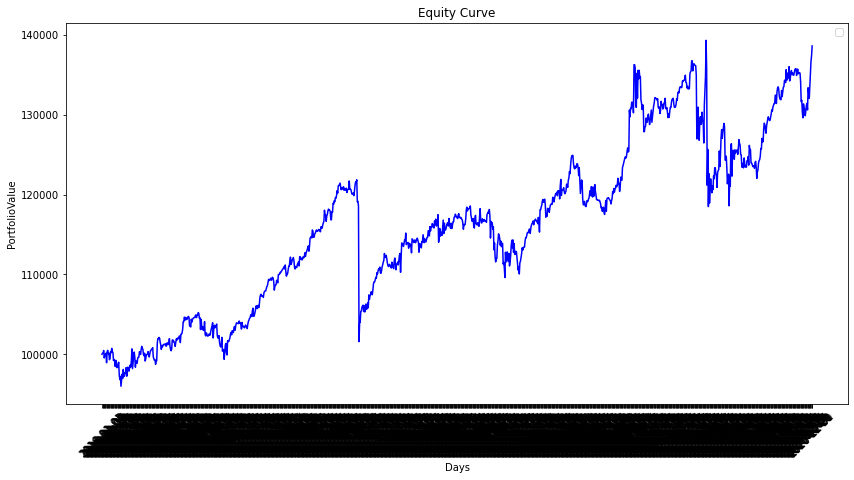

In [72]:
result.to_csv(output_path+"/final4.1.csv")

fig = plt.figure(figsize=(14,7))
plt.title('Equity Curve')
plt.xlabel('Days')
plt.ylabel('PortfolioValue')
plt.plot((result["BANKNIFTY_Date_CE"]).astype('str'),result['PortfolioValue'], c = 'blue')

plt.xticks(rotation=45)

plt.legend()
plt.show()

In [73]:
finallist = pd.DataFrame()
tradelist = result[ (result["D_marker"] == "F") | (result["D_marker"] == "L") ]

if list(tradelist.iloc[[-1]]["D_marker"])[0] == "F":
    tradelist.drop(tradelist.tail(1).index,inplace=True)
else:
    tradelist = tradelist

tr1 = tradelist[tradelist["D_marker"]=="F"].reset_index().drop(columns = ["index"])
tr2 = tradelist[tradelist["D_marker"]=="L"].reset_index().drop(columns = ["index"])

print(tr1.shape[0])
if tr1.shape[0] == tr2.shape[0]:
    for idx in tr1.index:
        mdict = {}
        mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
        mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
        mdict["Trade_Type"] = tr1["Trade_Type"][idx]
        for i in symbols:
            mdict[i + "Fut_Entry"] = tr1[i + "_OPT_Close_FUT"][idx]
            mdict[i + "_Fut_Exit"] = tr2[i + "_OPT_Close_FUT"][idx]
            mdict[i + "_Net_Delta"] = tr2[i + "_Net_Delta"][idx]
            for j in ["CE","PE"]:
                mdict[i + "_Entry_Price_" + j] = tr1[i + "_OPT_Close_" + j][idx] 
                mdict[i + "_Exit_Price_" + j] = tr2[i + "_OPT_Close_" + j][idx]
                mdict[i + "_Qty_" + j] = tr1[i + "_qty_final"][idx]
                if j == 'CE':
                    mdict[i + "_EQ_Entry_" + j] = tr1[i + "_EQ_Close_" + j][idx]
                    mdict[i + "_EQ_Exit_" + j] = tr2[i + "_EQ_Close_" + j][idx]
        temp = pd.DataFrame([mdict])
        #display(temp)
        finallist = finallist.append(temp)
else:
    print("Error, Tradelist not proper")

finallist.reset_index().drop(columns = ["index"])

60


,Entry_Date,Exit_Date,Trade_Type,AXISBANK_Entry_Price_CE,AXISBANK_Exit_Price_CE,AXISBANK_Qty_CE,AXISBANK_EQ_Entry_CE,AXISBANK_EQ_Exit_CE,AXISBANK_Entry_Price_PE,AXISBANK_Exit_Price_PE,...,YESBANK_Exit_Price_PE,YESBANK_Qty_PE,BANKNIFTY_Entry_Price_CE,BANKNIFTY_Exit_Price_CE,BANKNIFTY_Qty_CE,BANKNIFTY_EQ_Entry_CE,BANKNIFTY_EQ_Exit_CE,BANKNIFTY_Entry_Price_PE,BANKNIFTY_Exit_Price_PE,BANKNIFTY_Qty_PE
0,2016-01-01,2016-01-28,LISS,14.70,0.05,58.077171,449.90,405.65,12.10,44.35,...,13.69,51.205715,369.05,0.0500,14.680371,17033.8008,15398.7998,272.50,1601.2002,14.680371
1,2016-01-29,2016-02-25,LISS,14.50,0.05,64.760687,408.40,378.20,14.80,31.80,...,13.90,57.067563,390.55,0.0500,16.155333,15516.2002,13558.8496,357.95,1941.1504,16.155333
2,2016-02-26,2016-03-31,LISS,18.90,54.15,70.466213,386.35,444.15,20.35,0.05,...,0.05,62.192313,458.15,2329.9502,17.609725,13815.9004,16129.9502,414.15,0.0500,17.609725
3,2016-04-01,2016-04-28,LISS,17.40,18.05,61.107983,449.90,468.05,16.25,0.05,...,0.05,53.891121,437.45,507.9004,15.300194,16157.2998,16707.9004,384.10,0.0500,15.300194
4,2016-04-29,2016-05-26,LISS,18.85,49.00,59.780648,472.40,519.00,13.15,0.05,...,0.05,52.741985,429.30,556.5996,14.905496,16768.3008,17356.5996,345.65,0.0500,14.905496
5,2016-05-27,2016-06-30,LISS,21.45,23.50,58.745050,512.40,533.50,14.95,0.05,...,0.05,51.864332,398.40,414.1504,14.568953,17505.8496,17914.1504,408.45,0.0500,14.568953
6,2016-07-01,2016-07-28,LISS,16.85,3.85,56.306551,542.90,543.85,17.15,0.05,...,0.05,49.679958,390.45,1085.1992,14.167330,17965.8496,19085.1992,333.00,0.0500,14.167330
7,2016-07-29,2016-08-25,LISS,16.85,36.55,54.823271,546.15,586.55,17.20,0.05,...,0.05,48.352034,397.55,300.1992,13.732547,18957.6504,19300.1992,352.35,0.0500,13.732547
8,2016-08-26,2016-09-29,LISS,15.55,0.05,53.896563,586.40,539.30,18.25,50.70,...,17.84,47.533291,413.85,45.8496,13.633645,19190.0508,19245.8496,304.40,0.0500,13.633645
9,2016-09-30,2016-10-27,LISS,23.95,0.05,52.166270,541.35,485.65,19.20,54.35,...,1.28,46.075217,483.20,214.5996,13.238880,19321.8008,19514.5996,389.20,0.0500,13.238880


# Adding Expiry Roll OVer Entry Exit

In [74]:
# finallist_exp = pd.DataFrame()
# expirytrades = result[(result[index+ "_Date_CE"] == result[index+ "_curr_exp_date_CE"]) & (result["D_marker"] == "M")]
# #display(expirytrades)
# for idi, row1 in finallist.iterrows():
#     flag = 0
#     for idi, row2 in expirytrades.iterrows():
#         expdate = row2[index+ "_Date_CE"]
#         d1 = row1["Entry_Date"]
#         d2 = row1["Exit_Date"]
#         #print(expdate)
#         #print(d1)
#         #print(d2)
#         if (d1 < expdate < d2) & (flag ==  0):
#             mdict = {}
#             mdict["Expiry_Date"] = expdate
#             for i in symbols:
#                 for j in ["CE","PE"]:
#                     mdict[i + "_Exp_Adj_Entry_Price_" + j] = row2[i + "_Next_Month_Close_" + j]
#                     mdict[i + "_Exp_Adj_Exit_Price_" + j] = row2[i + "_OPT_Close_" + j]
#             temp = pd.DataFrame([mdict])
#             #display(temp)
#             finallist_exp = finallist_exp.append(temp)
#             flag = 1
#     if flag == 0:
#         mdict = {}
#         mdict["Expiry_Date"] = "NA"
#         for i in symbols:
#             for j in ["CE","PE"]:
#                 mdict[i + "_Exp_Adj_Entry_Price_" + j] = 0
#                 mdict[i + "_Exp_Adj_Exit_Price_" + j] = 0
#         temp = pd.DataFrame([mdict])
#         #display(temp)
#         finallist_exp = finallist_exp.append(temp)


# finallist_exp.reset_index().drop(columns = ["index"])

In [75]:
#tradelist =  pd.concat([finallist, finallist_exp], axis=1)

tradelist = finallist

In [76]:
display(tradelist)

,Entry_Date,Exit_Date,Trade_Type,AXISBANK_Entry_Price_CE,AXISBANK_Exit_Price_CE,AXISBANK_Qty_CE,AXISBANK_EQ_Entry_CE,AXISBANK_EQ_Exit_CE,AXISBANK_Entry_Price_PE,AXISBANK_Exit_Price_PE,...,YESBANK_Exit_Price_PE,YESBANK_Qty_PE,BANKNIFTY_Entry_Price_CE,BANKNIFTY_Exit_Price_CE,BANKNIFTY_Qty_CE,BANKNIFTY_EQ_Entry_CE,BANKNIFTY_EQ_Exit_CE,BANKNIFTY_Entry_Price_PE,BANKNIFTY_Exit_Price_PE,BANKNIFTY_Qty_PE
0,2016-01-01,2016-01-28,LISS,14.70,0.05,58.077171,449.90,405.65,12.10,44.35,...,13.69,51.205715,369.05,0.0500,14.680371,17033.8008,15398.7998,272.50,1601.2002,14.680371
0,2016-01-29,2016-02-25,LISS,14.50,0.05,64.760687,408.40,378.20,14.80,31.80,...,13.90,57.067563,390.55,0.0500,16.155333,15516.2002,13558.8496,357.95,1941.1504,16.155333
0,2016-02-26,2016-03-31,LISS,18.90,54.15,70.466213,386.35,444.15,20.35,0.05,...,0.05,62.192313,458.15,2329.9502,17.609725,13815.9004,16129.9502,414.15,0.0500,17.609725
0,2016-04-01,2016-04-28,LISS,17.40,18.05,61.107983,449.90,468.05,16.25,0.05,...,0.05,53.891121,437.45,507.9004,15.300194,16157.2998,16707.9004,384.10,0.0500,15.300194
0,2016-04-29,2016-05-26,LISS,18.85,49.00,59.780648,472.40,519.00,13.15,0.05,...,0.05,52.741985,429.30,556.5996,14.905496,16768.3008,17356.5996,345.65,0.0500,14.905496
0,2016-05-27,2016-06-30,LISS,21.45,23.50,58.745050,512.40,533.50,14.95,0.05,...,0.05,51.864332,398.40,414.1504,14.568953,17505.8496,17914.1504,408.45,0.0500,14.568953
0,2016-07-01,2016-07-28,LISS,16.85,3.85,56.306551,542.90,543.85,17.15,0.05,...,0.05,49.679958,390.45,1085.1992,14.167330,17965.8496,19085.1992,333.00,0.0500,14.167330
0,2016-07-29,2016-08-25,LISS,16.85,36.55,54.823271,546.15,586.55,17.20,0.05,...,0.05,48.352034,397.55,300.1992,13.732547,18957.6504,19300.1992,352.35,0.0500,13.732547
0,2016-08-26,2016-09-29,LISS,15.55,0.05,53.896563,586.40,539.30,18.25,50.70,...,17.84,47.533291,413.85,45.8496,13.633645,19190.0508,19245.8496,304.40,0.0500,13.633645
0,2016-09-30,2016-10-27,LISS,23.95,0.05,52.166270,541.35,485.65,19.20,54.35,...,1.28,46.075217,483.20,214.5996,13.238880,19321.8008,19514.5996,389.20,0.0500,13.238880


In [77]:
tradelist.to_csv(output_path+"/trdlist.csv")

In [78]:
####FOR NEXT MONTH CLOSE######

# pl_tradelist = tradelist.copy()
# plvalue = []
# pval = 0
# for idi, row in pl_tradelist.iterrows():

#     if row["Trade_Type"] == "SILS":
#         pvalce = row[index + "_Qty_CE"]*((row[index + "_Entry_Price_CE"] - row[index + "_Exp_Adj_Exit_Price_CE"])+(row[index + "_Exp_Adj_Entry_Price_CE"] - row[index + "_Exit_Price_CE"]))
#         pvalpe = row[index + "_Qty_PE"]*((row[index + "_Entry_Price_PE"] - row[index + "_Exp_Adj_Exit_Price_PE"])+(row[index + "_Exp_Adj_Entry_Price_PE"] - row[index + "_Exit_Price_PE"]))
#         pval = pvalce + pvalpe

#         for i in stock_list:
#             pvalce = row[i + "_Qty_CE"]*((row[i + "_Exp_Adj_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])+(row[i + "_Exit_Price_CE"] - row[i + "_Exp_Adj_Entry_Price_CE"]))
#             pvalpe = row[i + "_Qty_PE"]*((row[i + "_Exp_Adj_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])+(row[i + "_Exit_Price_PE"] - row[i + "_Exp_Adj_Entry_Price_PE"]))
#             pval += pvalce + pvalpe    

#     if row["Trade_Type"] == "LISS":
#         pvalce = row[index + "_Qty_CE"]*((row[index + "_Exp_Adj_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])+(row[index + "_Exit_Price_CE"] - row[index + "_Exp_Adj_Entry_Price_CE"]))
#         pvalpe = row[index + "_Qty_PE"]*((row[index + "_Exp_Adj_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])+(row[index + "_Exit_Price_PE"] - row[index + "_Exp_Adj_Entry_Price_PE"]))
#         pval = pvalce + pvalpe

#         for i in stock_list:
#             pvalce = row[i + "_Qty_CE"]*((row[i + "_Entry_Price_CE"] - row[i + "_Exp_Adj_Exit_Price_CE"])+(row[i + "_Exp_Adj_Entry_Price_CE"] - row[i + "_Exit_Price_CE"]))
#             pvalpe = row[i + "_Qty_PE"]*((row[i + "_Entry_Price_PE"] - row[i + "_Exp_Adj_Exit_Price_PE"])+(row[i + "_Exp_Adj_Entry_Price_PE"] - row[i + "_Exit_Price_PE"]))
#             pval += pvalce + pvalpe    

#     plvalue.append(pval)
                    
# pl_tradelist['pl'] = plvalue
# pl_tradelist.to_csv(output_path+"\pl_trdlist.csv")




In [79]:
pl_tradelist = tradelist.copy()
plvalue = []
pval = 0
for idi, row in pl_tradelist.iterrows():

    if row["Trade_Type"] == "SILS":
        pvalce = row[index + "_Qty_CE"]*(row[index + "_Entry_Price_CE"] - row[index + "_Exit_Price_CE"])
        pvalpe = row[index + "_Qty_PE"]*(row[index + "_Entry_Price_PE"] - row[index + "_Exit_Price_PE"])
        pval = pvalce + pvalpe

        for i in stock_list:
            pvalce = row[i + "_Qty_CE"]*(row[i + "_Exit_Price_CE"] - row[i + "_Entry_Price_CE"])
            pvalpe = row[i + "_Qty_PE"]*(row[i + "_Exit_Price_PE"] - row[i + "_Entry_Price_PE"])
            pval += pvalce + pvalpe    

    if row["Trade_Type"] == "LISS":
        pvalce = row[index + "_Qty_CE"]*(row[index + "_Exit_Price_CE"] - row[index + "_Entry_Price_CE"])
        pvalpe = row[index + "_Qty_PE"]*(row[index + "_Exit_Price_PE"] - row[index + "_Entry_Price_PE"])
        pval = pvalce + pvalpe

        for i in stock_list:
            pvalce = row[i + "_Qty_CE"]*(row[i + "_Entry_Price_CE"] - row[i + "_Exit_Price_CE"])
            pvalpe = row[i + "_Qty_PE"]*(row[i + "_Entry_Price_PE"] - row[i + "_Exit_Price_PE"])
            pval += pvalce + pvalpe    

            

    plvalue.append(pval)

    
    
pl_tradelist['pl'] = plvalue

for i in symbols:
    pl_tradelist[i + '_%_Change'] = ( pl_tradelist[i + "_EQ_Exit_CE"] / pl_tradelist[i + "_EQ_Entry_CE"] ) - 1
    pl_tradelist[fut_pl] += -pl_tradelist[i + "_Net_Delta"]*(pl_tradelist[i+"Fut_Entry"] - pl_tradelist[i+"Fut_Exit"])

pl_tradelist.to_csv(output_path+"\pl_trdlist.csv")




In [82]:
### Calculate CAGR 

df = result.copy()
from pyxirr import xirr

firstValue = round(df.loc[0, 'PortfolioValue'],4)
lastValue = round(df.loc[df.index[-1], 'PortfolioValue'],4)

firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

dates = [firstDate, lastDate]
amounts = [-firstValue, lastValue]

xirr = xirr(dates, amounts)

print(xirr*100)
### Calculate Daily Drawdown

Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0


#Roll_Max[0:50], Daily_Drawdown[0:50]

df['Daily_Drawdown'] = Daily_Drawdown * 100

print("max dd", min(df['Daily_Drawdown']))

df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

### Monthly PNL Percentage 

df['BANKNIFTY_curr_exp_date_CE'] = pd.to_datetime(df['BANKNIFTY_curr_exp_date_CE'], dayfirst=True)

df['Year'] = pd.DatetimeIndex(df['BANKNIFTY_curr_exp_date_CE']).year
df['Month'] = pd.DatetimeIndex(df['BANKNIFTY_curr_exp_date_CE']).month
df.to_csv(output_path + '/df.csv', index=False)

i = 0
dfg = df.groupby(['Year', 'Month'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)
    
i = 0
dfg = df.groupby(['Year'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Yearly'] = change * 100
    
df

df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
df1 = df1.drop_duplicates()
df1

pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                         columns =['Month'])
pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

pivotTable.index

def _color_red_or_green(val):
    color = '#EE0000' if val < 0 else '#00EE00'
    return 'background-color: %s' % color
pivotTable.style.applymap(_color_red_or_green)




6.7462938589953945
max dd -16.637781813998277


,,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,Change_%_Yearly,,,,,,,,,,,,
2016,3.473627933294421,0.270000,-3.010000,1.680000,1.090000,2.010000,-0.180000,2.270000,0.480000,-2.200000,-0.230000,-0.440000,1.830000
2017,8.376654570682373,1.260000,3.010000,1.900000,0.940000,1.080000,2.180000,2.420000,3.130000,-0.360000,-13.820000,4.880000,2.810000
2018,2.195855136534086,-0.780000,2.420000,-0.140000,1.860000,-0.310000,1.390000,0.910000,-1.490000,0.010000,-2.220000,-1.210000,1.850000
2019,14.112924746511602,3.060000,0.570000,1.510000,3.590000,-5.120000,0.720000,0.190000,1.840000,8.030000,-2.810000,3.320000,-1.030000
2020,6.000562788343333,2.090000,2.440000,-5.530000,-4.520000,0.780000,1.000000,-1.270000,2.140000,3.780000,2.430000,0.500000,2.470000
